### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [142]:
os.makedirs('images', exist_ok=True)
os.makedirs('images/all', exist_ok=True)
os.makedirs('images/bar', exist_ok=True)
os.makedirs('images/coffee_house', exist_ok=True)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [143]:
data = pd.read_csv('data/coupons.csv')

2. Investigate the dataset for missing or problematic data.

### Assumptions

- The survey form presented to users is assumed to be a **multiple-choice questionnaire**.
- There are **no free-text inputs**, so the possibility of typos or inconsistent text entries in the dataset is minimal.

---

### Approach to Investigating Missing or Problematic Data

1. **Understand the Underlying Data**
   - Inspect the **data types** and **unique values** for each column to gain insight into the nature of the data.

2. **Identify Missing Values**
   - Examine which columns contain missing data and assess the extent of missingness.

3. **Identify Duplicated Rows**
   - Examine which if dataset has any duplicated rows

4. **Rename Columns for Clarity and Consistency**
   - Use **descriptive names** to make the data easier to interpret.
   - Apply a consistent naming convention:
     - Use lowercase letters.
     - Separate words with underscores (`_`).
     - Prefix boolean fields with `is_` or `has_`.
     - Correct any misspellings.

   **Examples of Renaming:**

   | Original Column        | Renamed Column                      |
   |------------------------|-------------------------------------|
   | `Passanger`            | `passenger`                         |
   | `Y`                    | `is_coupon_accepted`                |
   | `RestaurantLessThan20` | `eat_at_restaurant_under_20_count`  |
   | `Restaurant20To50`     | `eat_at_restaurant_20_to_50_count`  |
   | `toCoupon_GEQ5min`     | `is_travel_time_ge_5min`            |
   | `toCoupon_GEQ15min`    | `is_travel_time_ge_15min`           |
   | `toCoupon_GEQ25min`    | `is_travel_time_ge_25min`           |
   | `direction_same`       | `is_direction_same`                 |
   | `direction_opp`        | `is_direction_opp`                  |
   | `CarryAway`            | `carry_away`                        |
   | `CoffeeHouse`          | `coffee_house`                      |
   | `Bar`                  | `bar`                               |
   | `maritalStatus`        | `marital_status`                    |

This structured approach ensures the dataset is clean, interpretable, and ready for accurate analysis.


In [144]:
# Rename columns for clarity: use descriptive, correctly spelled names with consistent casing; prefix boolean columns with 'is' or 'has' to reflect their binary nature.
data.rename(columns = {
    'passanger': 'passenger',
    'RestaurantLessThan20': 'eat_at_restaurant_under_20_count',
    'Restaurant20To50': 'eat_at_restaurant_20_to_50_count',
    'toCoupon_GEQ5min': 'is_travel_time_ge_5min',
    'toCoupon_GEQ15min': 'is_travel_time_ge_15min',
    'toCoupon_GEQ25min': 'is_travel_time_ge_25min',
    'direction_same': 'is_direction_same',
    'direction_opp': 'is_direction_opp',
    'CarryAway': 'carry_away',
    'CoffeeHouse': 'coffee_house',
    'Bar': 'bar',
    'maritalStatus': 'marital_status',
    'Y': 'is_coupon_accepted'
}, inplace=True)

In [145]:
# Understand the underlying data
# Transpose the rows to columns so it is easy to inspect all the columns
sample_df = data.sample(5)
sample_df.index.name = "Row Num"
sample_df_T = sample_df.T
# sort the column names for easy inspection
sample_df_T = sample_df_T.sort_index(axis=0)
sample_df_T

Row Num,524,3042,4670,3815,2362
age,50plus,21,below21,21,21
bar,1~3,less1,never,never,4~8
car,NaN,NaN,NaN,NaN,NaN
carry_away,4~8,less1,1~3,1~3,gt8
coffee_house,1~3,never,1~3,never,less1
coupon,Coffee House,Coffee House,Restaurant(<20),Coffee House,Coffee House
destination,No Urgent Place,Work,Home,Home,No Urgent Place
eat_at_restaurant_20_to_50_count,less1,less1,1~3,less1,1~3
eat_at_restaurant_under_20_count,4~8,less1,4~8,1~3,1~3
education,Graduate degree (Masters or Doctorate),Some college - no degree,Some college - no degree,Some college - no degree,Some college - no degree


In [146]:
# print the data type and unique values in each column
for col in data.columns.sort_values():
    print("Type = " + str(data[col].dtype))
    print(data[col].value_counts(dropna=False))
    print("-" * 30)

Type = object
age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64
------------------------------
Type = object
bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: count, dtype: int64
------------------------------
Type = object
car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64
------------------------------
Type = object
carry_away
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: count, dtype: int64
------------------------------
Type = object
coffee_house
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111


In [147]:
# Fetch the columns with null values
def get_missing_values(df):
    dataNullStats = df.isnull().agg(['sum', 'mean'])
    dataNullStats = dataNullStats.T
    return dataNullStats[dataNullStats['sum'] > 0]

print(get_missing_values(data))

                                      sum      mean
car                               12576.0  0.991485
bar                                 107.0  0.008436
coffee_house                        217.0  0.017108
carry_away                          151.0  0.011905
eat_at_restaurant_under_20_count    130.0  0.010249
eat_at_restaurant_20_to_50_count    189.0  0.014901


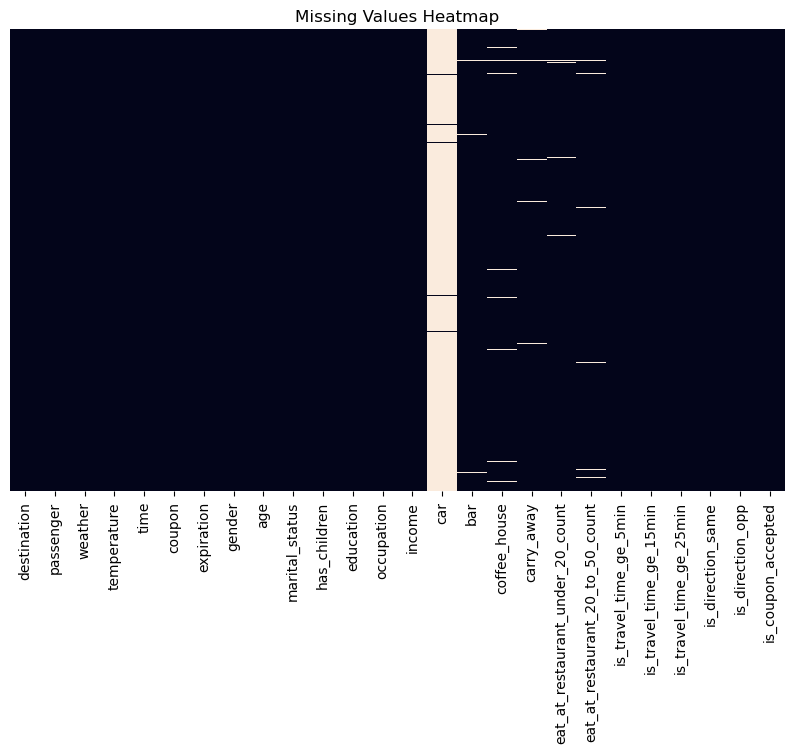

In [148]:
# Visualize the missing values with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [149]:
# look for duplicated rows
num_duplicates = data.duplicated().sum()
if num_duplicates > 0:
    print(f"Number of duplicated rows = {num_duplicates}")
    data = data.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicate rows found.")


Number of duplicated rows = 74
Duplicates removed.


3. Decide what to do about your missing data -- drop, replace, other...

### Handling Missing Data

- The **`car`** column has the highest proportion of missing values. Since there isn’t a reliable basis for imputing them, we will **leave these values as missing**.

- The **`bar`** column contains categorical data. We'll impute its missing values using the **mode** (the most frequent value).

- For the **remaining columns**, the percentage of missing values is relatively low. Filling these is **unlikely to significantly influence the analysis or outcomes**.


In [150]:
# Since only columns with categorial values have missing values fill them with most frequently occurring value
print("** missing values before **")
print(get_missing_values(data))
print("")

bar_mode = data['bar'].mode()[0]
print("Fill missing value for 'bar' with value = " + bar_mode)
data['bar'] = data['bar'].fillna(bar_mode)

print("")
print("** missing values after **")
print(get_missing_values(data))

** missing values before **
                                      sum      mean
car                               12502.0  0.991435
bar                                 107.0  0.008485
coffee_house                        217.0  0.017209
carry_away                          150.0  0.011895
eat_at_restaurant_under_20_count    129.0  0.010230
eat_at_restaurant_20_to_50_count    189.0  0.014988

Fill missing value for 'bar' with value = never

** missing values after **
                                      sum      mean
car                               12502.0  0.991435
coffee_house                        217.0  0.017209
carry_away                          150.0  0.011895
eat_at_restaurant_under_20_count    129.0  0.010230
eat_at_restaurant_20_to_50_count    189.0  0.014988


4. What proportion of the total observations chose to accept the coupon?



  is_coupon_accepted  proportion
0                Yes          56
1                 No          43


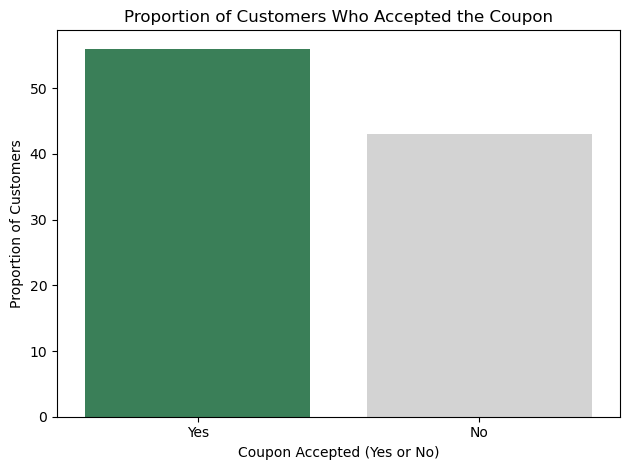

In [151]:
# Calculate the proportion coupon acceptance 
coupon_accepted_portion_df = data["is_coupon_accepted"].value_counts(normalize=True).reset_index()
coupon_accepted_portion_df['proportion'] = (coupon_accepted_portion_df['proportion'] * 100).astype(int)
coupon_accepted_portion_df['is_coupon_accepted'] = coupon_accepted_portion_df['is_coupon_accepted'].replace({1: 'Yes', 0: 'No'})
print(coupon_accepted_portion_df)

# Visualize the proportion of coupon acceptance
sns.barplot(data=coupon_accepted_portion_df, x='is_coupon_accepted', y='proportion', hue='is_coupon_accepted', palette={'Yes': 'seagreen', 'No': 'lightgray'})
plt.title("Proportion of Customers Who Accepted the Coupon")
plt.xlabel("Coupon Accepted (Yes or No)")
plt.ylabel("Proportion of Customers")
plt.tight_layout()
plt.savefig('images/all/coupon_acceptance_rate.png')
plt.show()


5. Use a bar plot to visualize the `coupon` column.

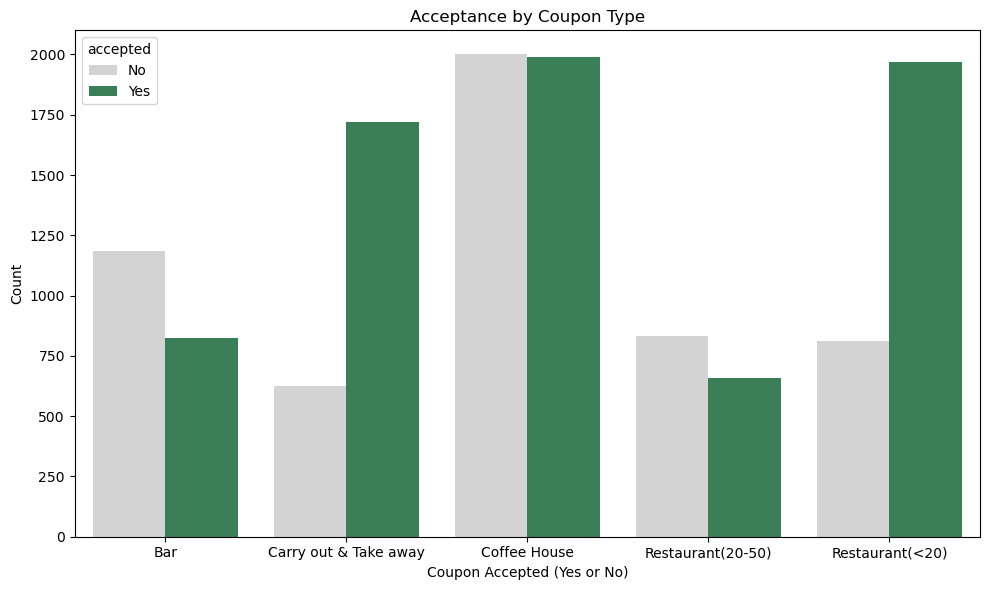

In [152]:
# acceptance by coupon type
coupon_accepted_df = data.groupby(['coupon', 'is_coupon_accepted']).size().reset_index(name='count')
coupon_accepted_df['is_coupon_accepted'] = coupon_accepted_df['is_coupon_accepted'].replace({1: 'Yes', 0: 'No'})

# rename for clarity
coupon_accepted_df.rename(columns = {
    'is_coupon_accepted': 'accepted'
}, inplace=True)

# plot the visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=coupon_accepted_df, x='coupon', y='count', hue='accepted', palette={'Yes': 'seagreen', 'No': 'lightgray'})
plt.title("Acceptance by Coupon Type")
plt.xticks(rotation=0, ha='center')
plt.xlabel("Coupon Accepted (Yes or No)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('images/all/coupon_acceptance_by_type.png')
plt.show()

6. Use a histogram to visualize the temperature column.

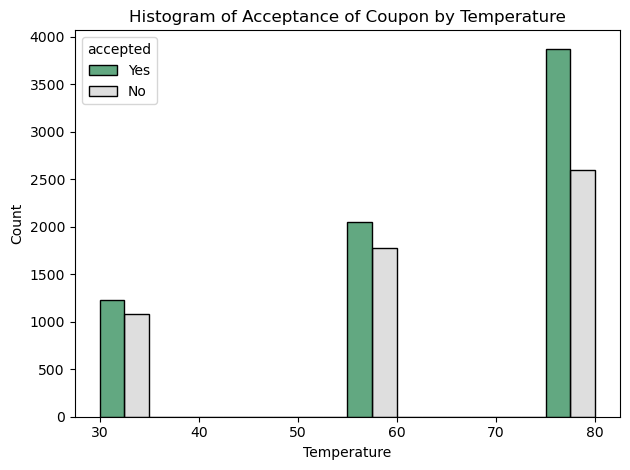

In [153]:
temperature_df = data[['temperature', 'is_coupon_accepted']].copy()
temperature_df['is_coupon_accepted'] = temperature_df['is_coupon_accepted'].replace({1: 'Yes', 0: 'No'})

# rename for clarity
temperature_df.rename(columns = {
    'is_coupon_accepted': 'accepted'
}, inplace=True)

sns.histplot(temperature_df, x="temperature", hue="accepted", multiple="dodge", binwidth=5, palette={'Yes': 'seagreen', 'No': 'lightgray'})
plt.title("Histogram of Acceptance of Coupon by Temperature")
plt.xlabel("Temperature")
plt.tight_layout()
plt.savefig('images/all/coupon_acceptance_by_temperature.png')
plt.show()


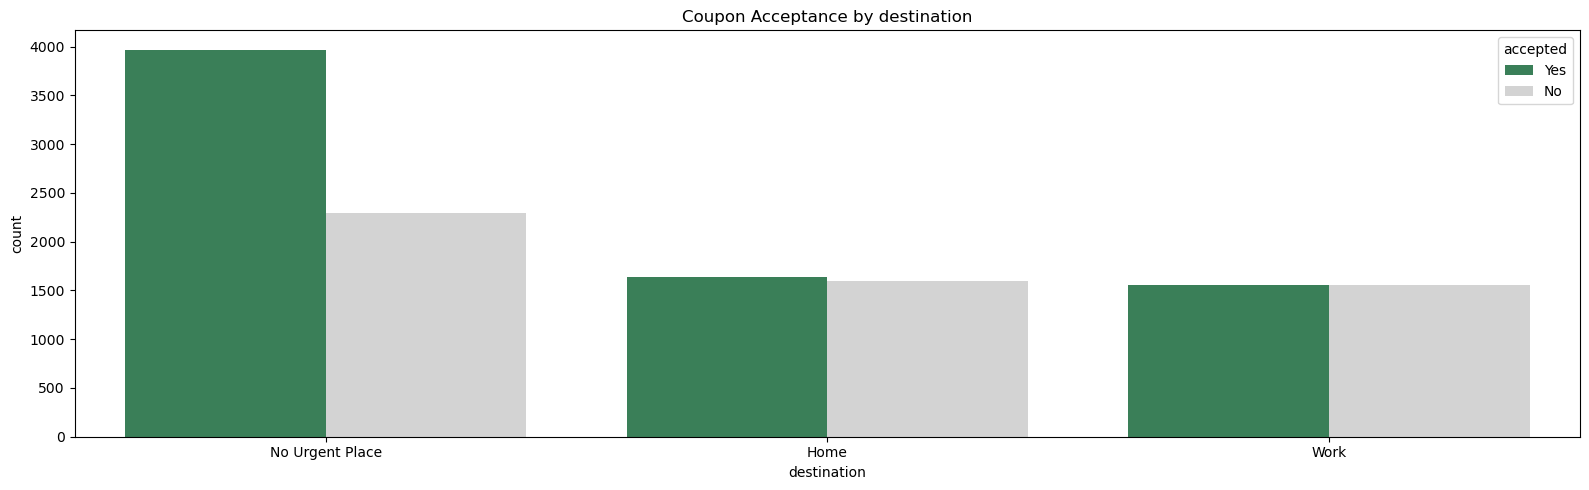

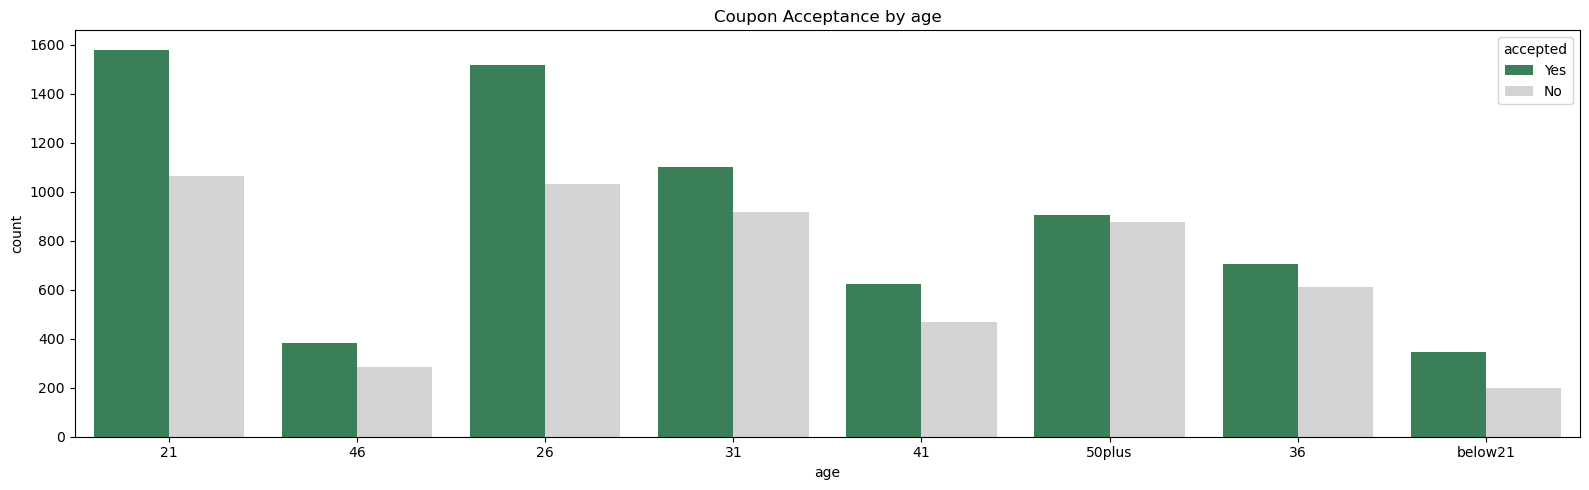

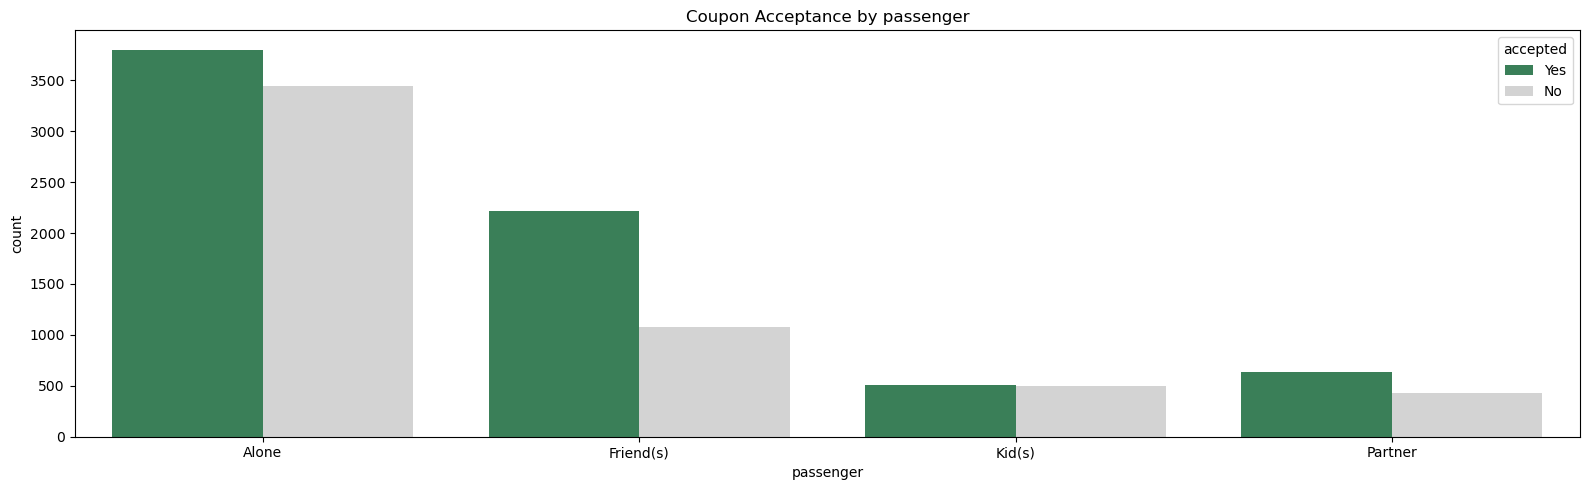

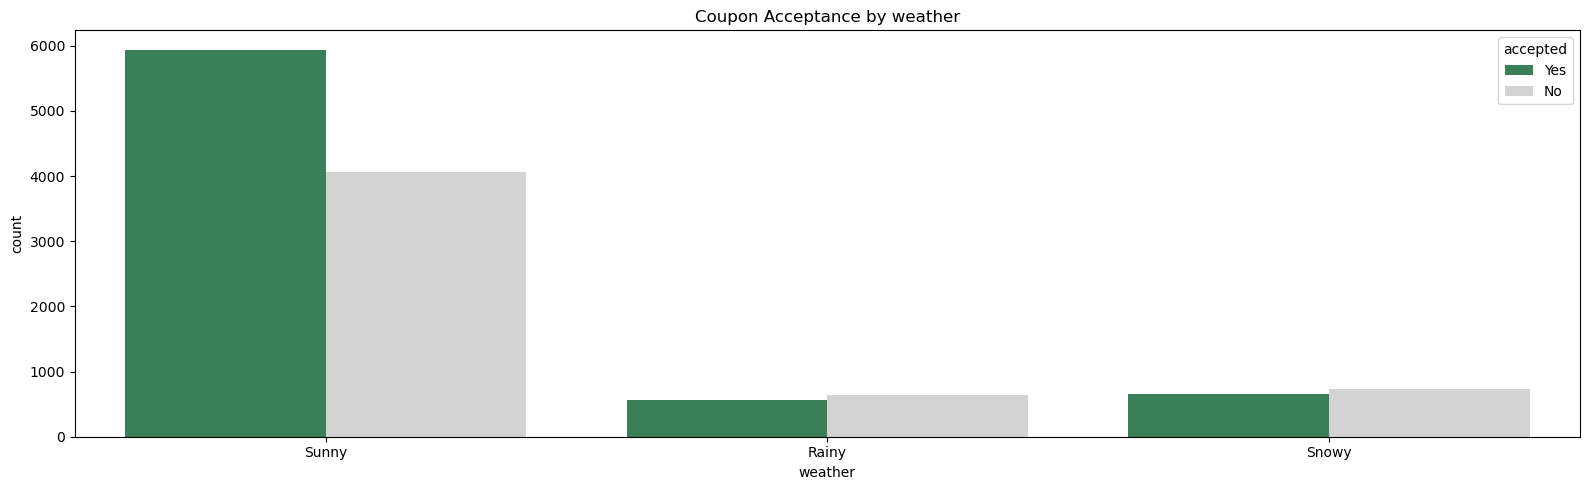

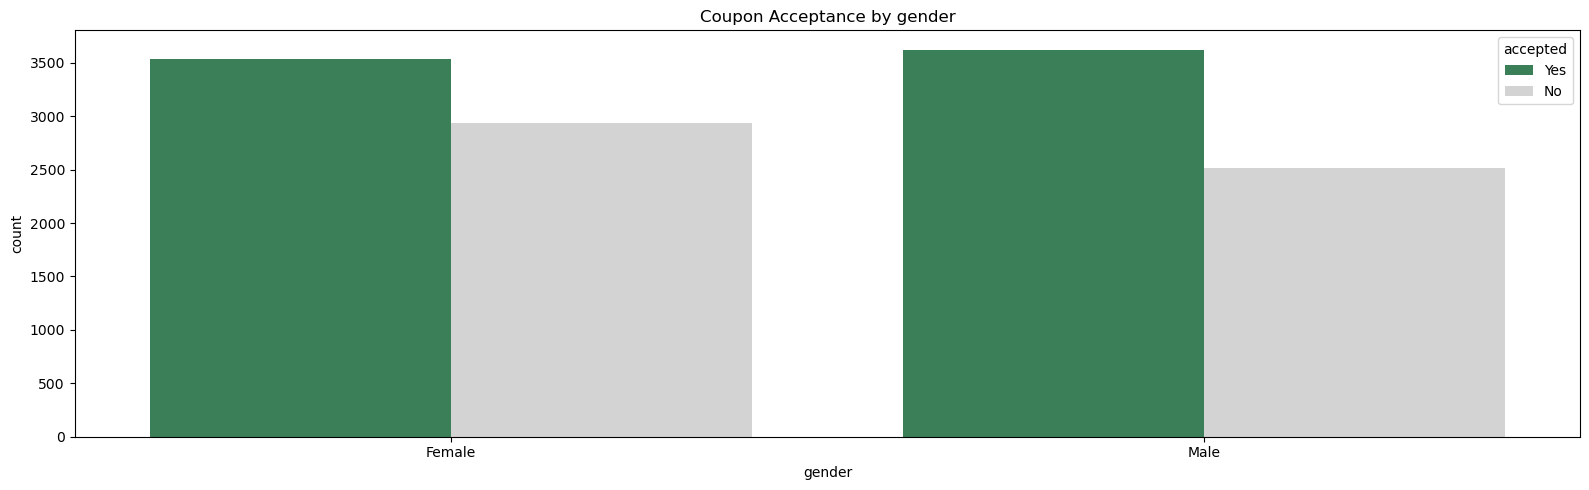

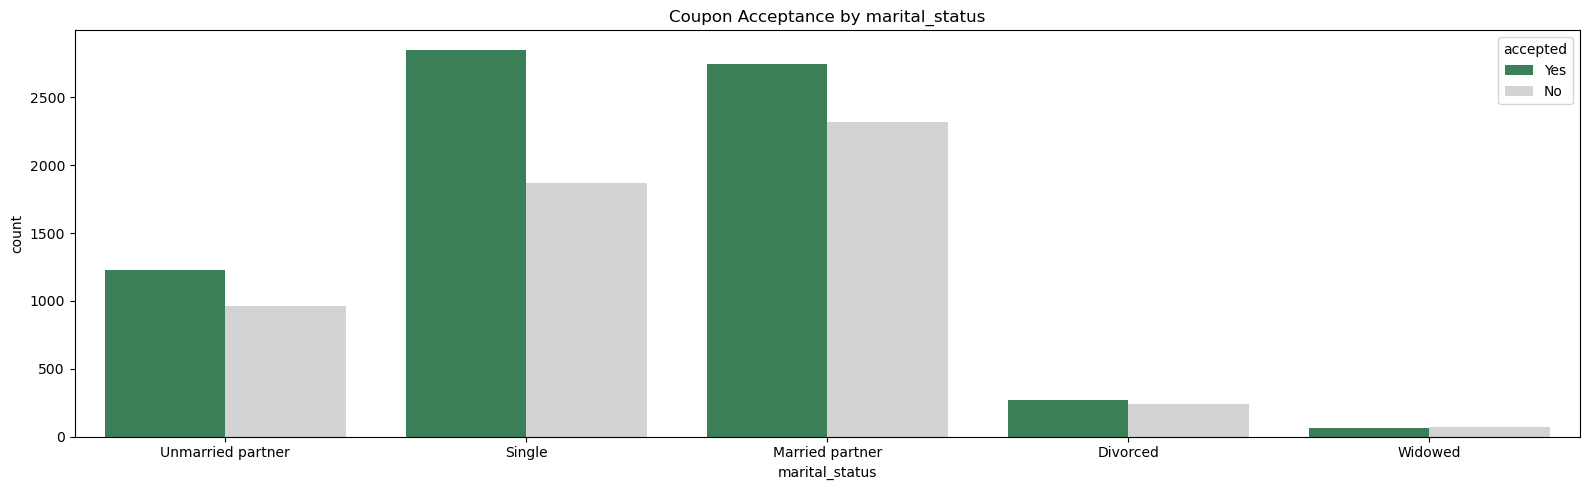

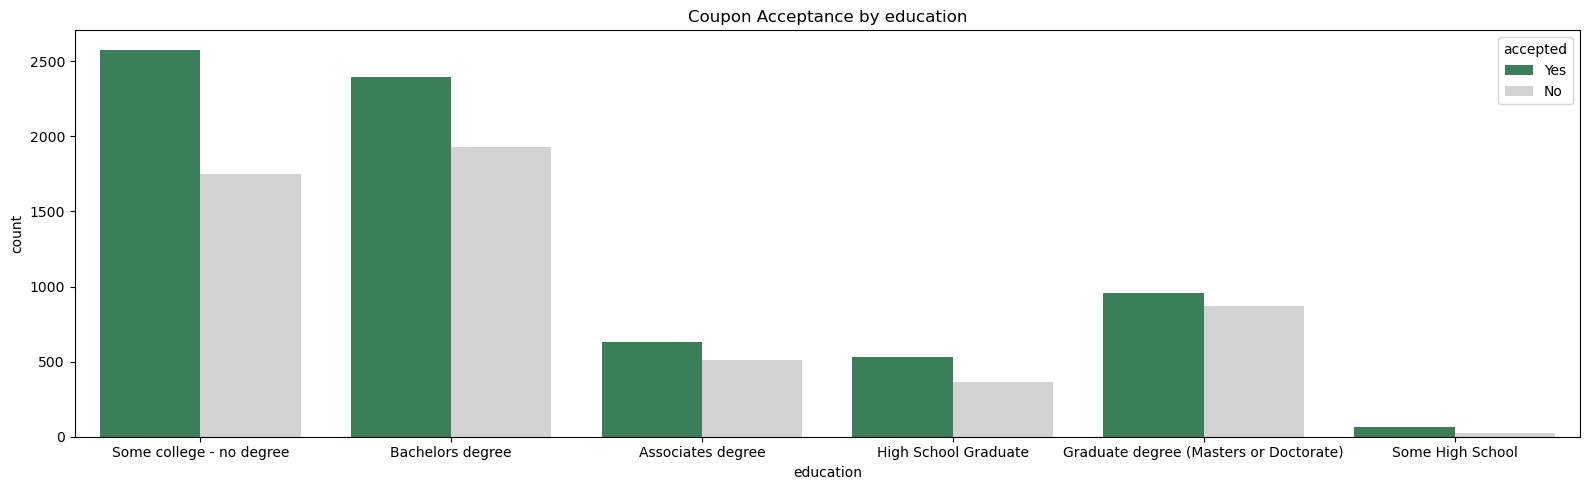

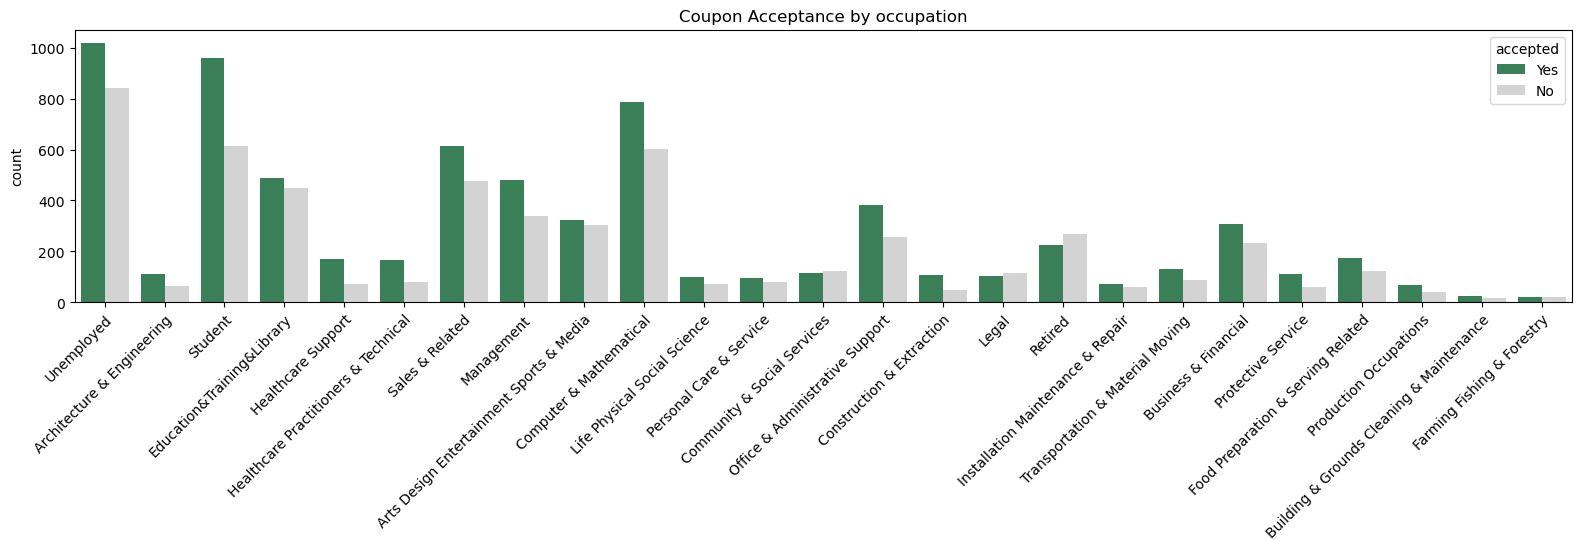

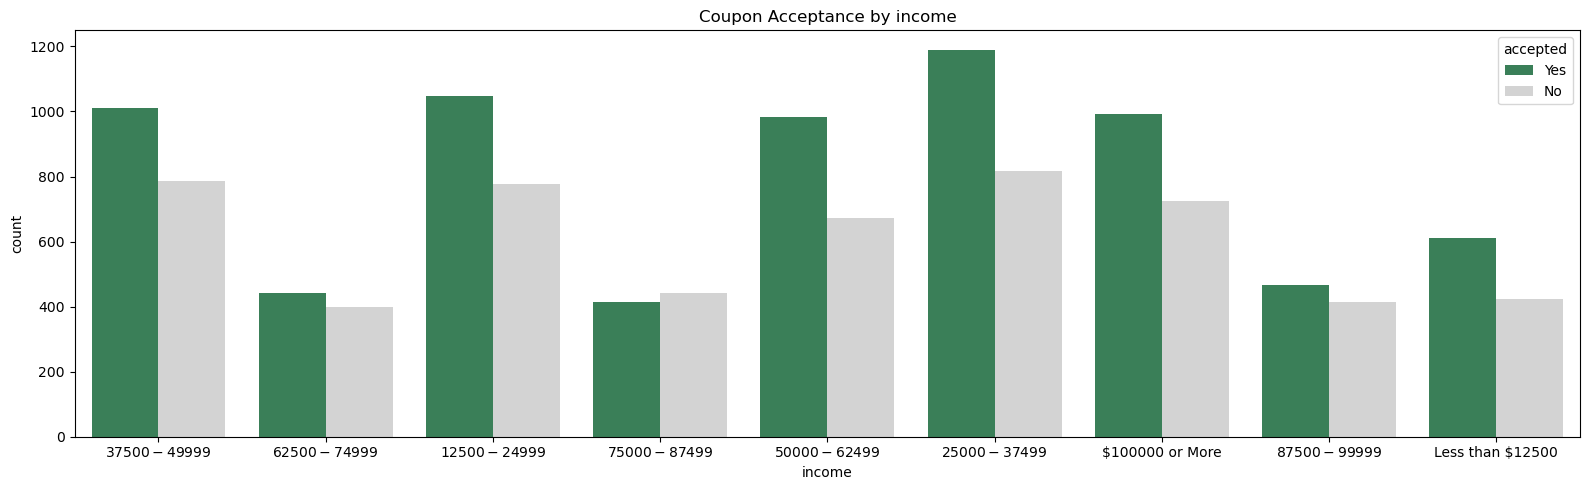

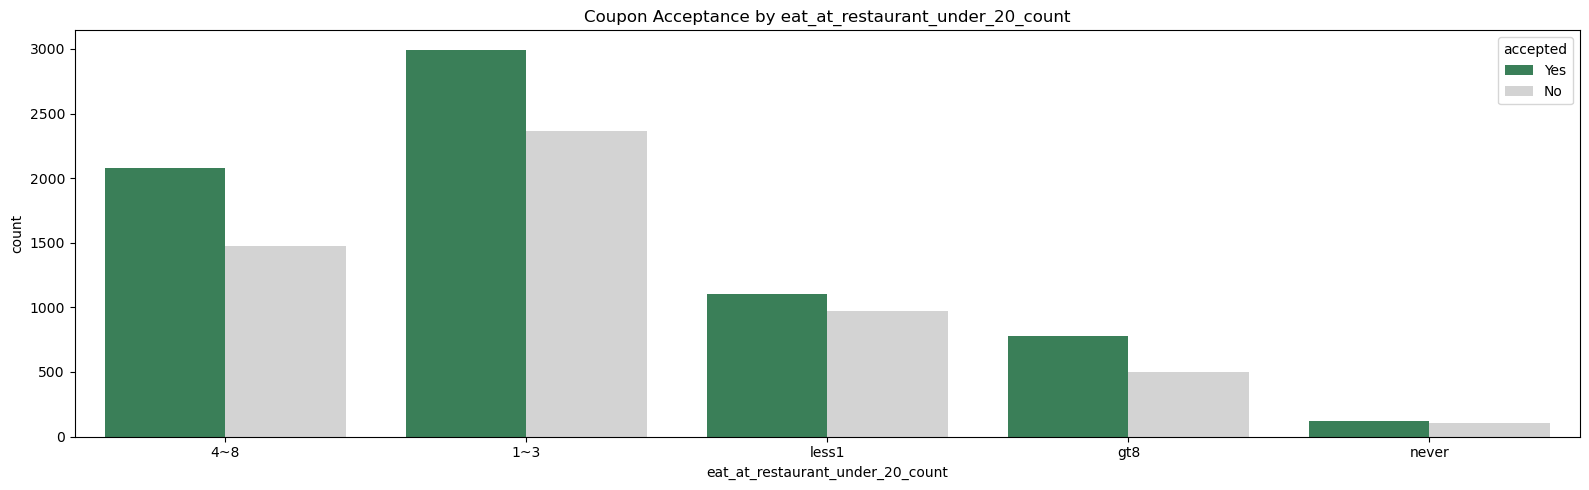

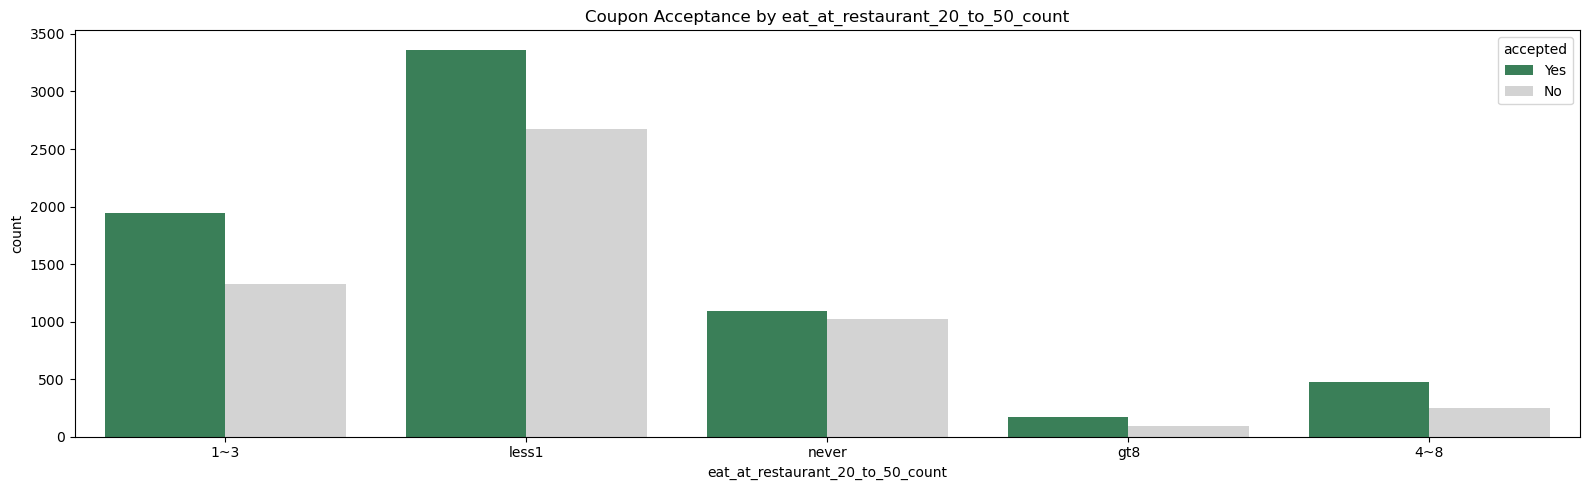

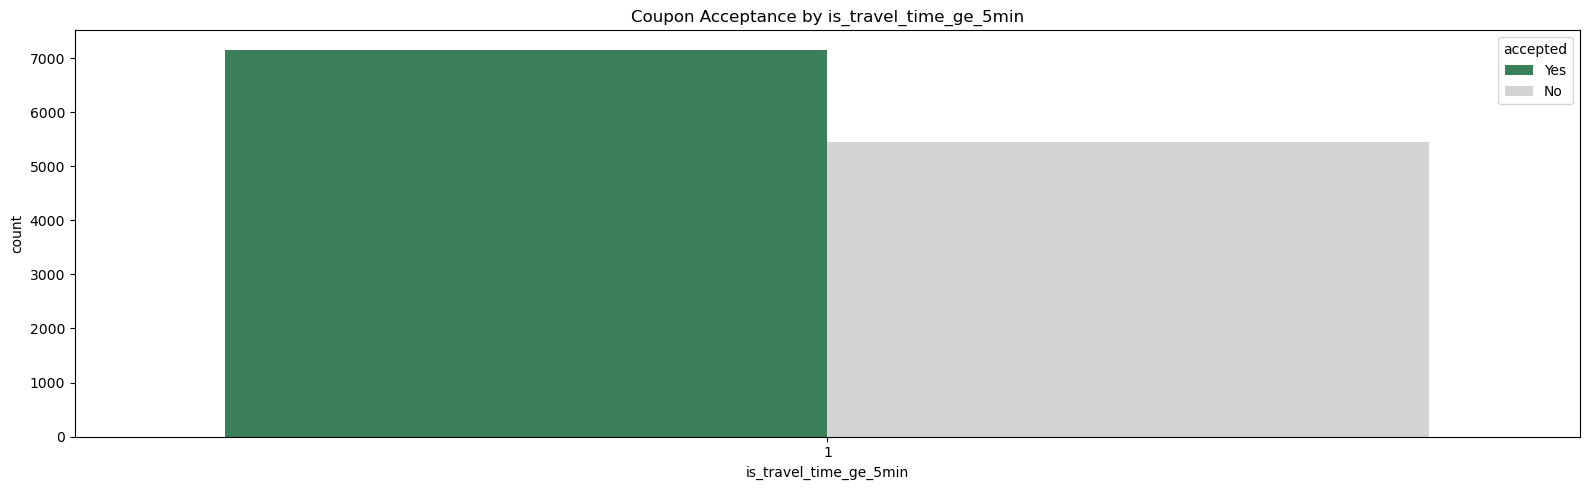

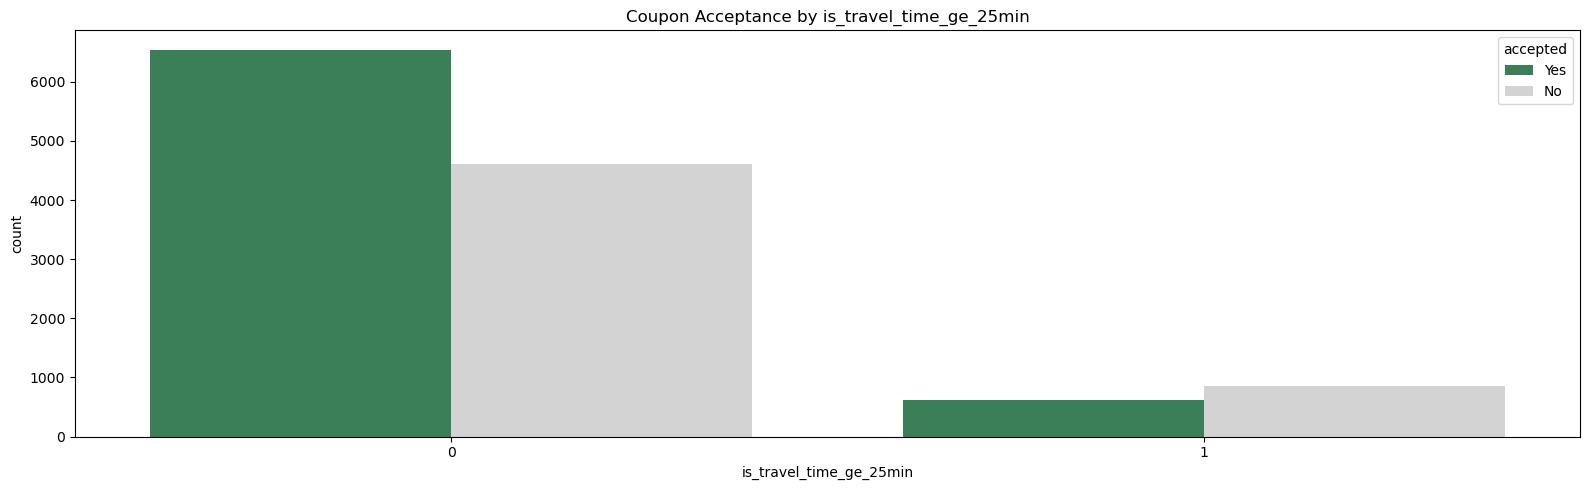

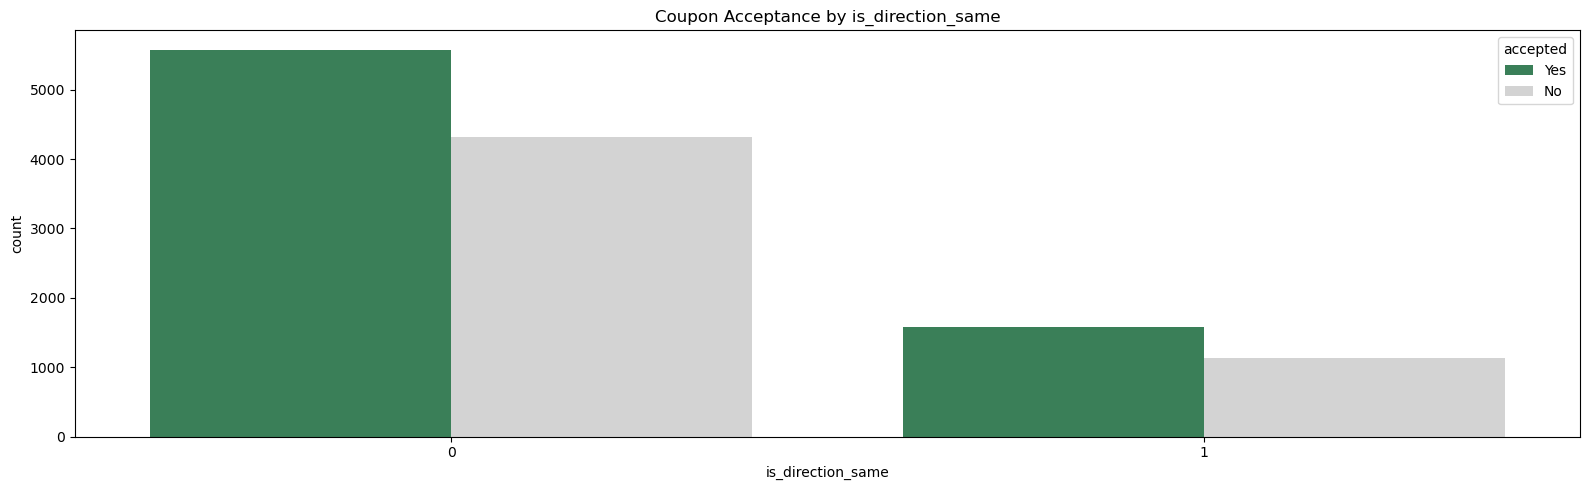

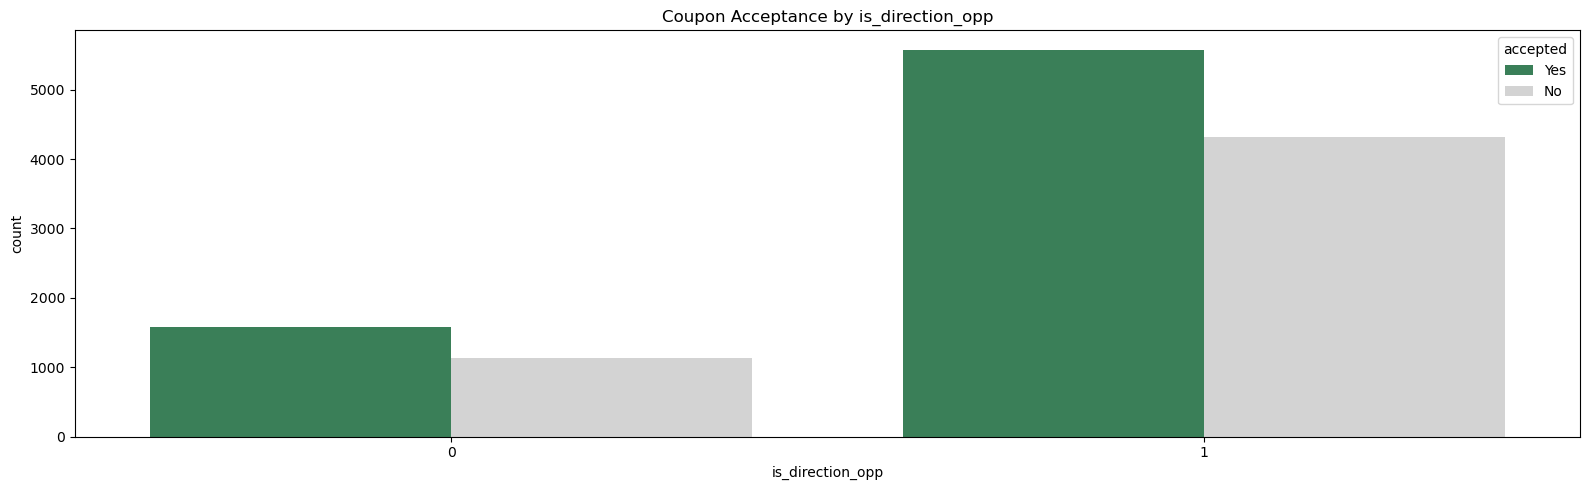

In [154]:
# Extend the analysis to other categorical columns
categorial_columns = ["destination", "age", "passenger", "weather", "gender", "marital_status", "education", "occupation", "income", "eat_at_restaurant_under_20_count", "eat_at_restaurant_20_to_50_count", "is_travel_time_ge_5min", "is_travel_time_ge_25min", "is_direction_same", "is_direction_opp"]

for column in categorial_columns:
    df = data[[column, 'is_coupon_accepted']].copy()
    df['is_coupon_accepted'] = df['is_coupon_accepted'].replace({1: 'Yes', 0: 'No'})

    # rename for clarity
    df.rename(columns = {
        'is_coupon_accepted': 'accepted'
    }, inplace=True)

    plt.figure(figsize=(16, 5))
    sns.countplot(
        data=df,
        x=column,
        hue="accepted",
        palette={'Yes': 'seagreen', 'No': 'lightgray'}
    )

    plt.title(f"Coupon Acceptance by {column}")
    plt.xlabel(column)

    if column == "occupation":
        plt.xticks(rotation=45, ha='right', wrap=True)

    plt.tight_layout()
    plt.savefig(f'images/all/coupon_acceptance_by_{column}.png')
    plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [155]:
bar_df = data.query("coupon == 'Bar'")
bar_df.head(5)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,coffee_house,carry_away,eat_at_restaurant_under_20_count,eat_at_restaurant_20_to_50_count,is_travel_time_ge_5min,is_travel_time_ge_15min,is_travel_time_ge_25min,is_direction_same,is_direction_opp,is_coupon_accepted
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


  accepted  proportion
0       No          59
1      Yes          40


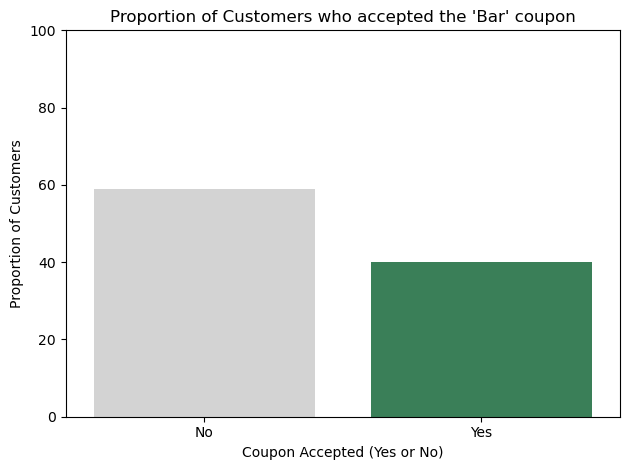

In [156]:
bar_coupon_proportion_df = bar_df['is_coupon_accepted'].value_counts(normalize=True).reset_index(name="proportion")
bar_coupon_proportion_df['is_coupon_accepted'] = bar_coupon_proportion_df['is_coupon_accepted'].replace({1: 'Yes', 0: 'No'})
bar_coupon_proportion_df.rename(columns = {
    'is_coupon_accepted': 'accepted'
}, inplace=True)

bar_coupon_proportion_df['proportion'] = (bar_coupon_proportion_df['proportion'] * 100).astype(int)

print(bar_coupon_proportion_df)

# Visualize the proportion of coupon acceptance
sns.barplot(data=bar_coupon_proportion_df, x='accepted', y='proportion', hue='accepted', palette={'Yes': 'seagreen', 'No': 'lightgray'})
plt.ylim(0, 100)
plt.title("Proportion of Customers who accepted the 'Bar' coupon")
plt.xlabel("Coupon Accepted (Yes or No)")
plt.ylabel("Proportion of Customers")
plt.tight_layout()
plt.savefig('images/bar/bar_coupon_acceptance_rate.png')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

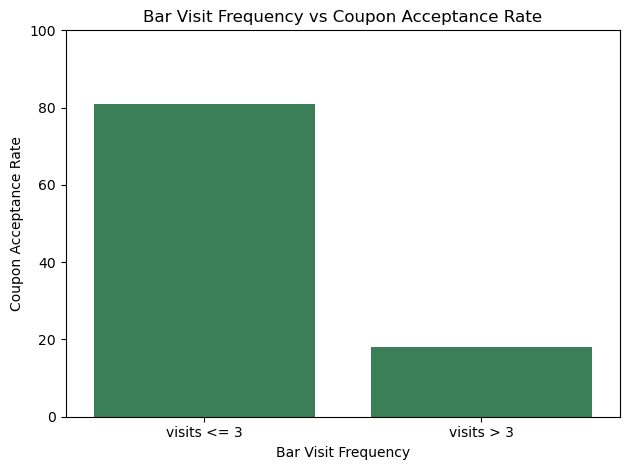

In [157]:
# seek counts of persons who went to bar and accepted the coupon
bar_accepted_df = bar_df[bar_df["is_coupon_accepted"] == 1].groupby(["bar", "is_coupon_accepted"]).size().reset_index(name = "count")

# seek counts of persons who went to bar 3 or fewer times and accepted the coupon
count_acceptance_fewer_3 = bar_accepted_df[bar_accepted_df["bar"].isin(['never', '1~3', 'less1'])]["count"].sum()

# seek counts of persons who went to bar more than 3 times and accepted the coupon
count_acceptance_more_3 = bar_accepted_df[bar_accepted_df["bar"].isin(['4~8', 'gt8'])]["count"].sum()

# general formula => rate = (acceptance count) / (total)
total = count_acceptance_fewer_3 + count_acceptance_more_3
acceptance_fewer_3 = int(100 * count_acceptance_fewer_3/total)
acceptance_more_3 = int(100 * count_acceptance_more_3/total)

# print("The acceptance rate of those who went to a bar 3 or fewer is " + str(acceptance_fewer_3))
# print("The acceptance rate of those who went to a bar more than 3 is " + str(acceptance_more_3))

# convert the values to dictionay so it can be transformed to dataframe for visualization
acceptance_rate_bar_dict = {
    "rate": [acceptance_fewer_3, acceptance_more_3],
    "group": ["visits <= 3", "visits > 3"]
}
acceptance_rate_bar_df = pd.DataFrame(acceptance_rate_bar_dict)
#print(acceptance_rate_bar_df)

# visualize the rate of acceptance
sns.barplot(data=acceptance_rate_bar_df, x='group', y='rate', color="seagreen")
plt.title("Bar Visit Frequency vs Coupon Acceptance Rate")
plt.ylim(0, 100)
plt.xlabel("Bar Visit Frequency")
plt.ylabel("Coupon Acceptance Rate")
plt.tight_layout()
plt.savefig('images/bar/bar_coupon_acceptance_rate_by_frequency.png')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to all others.  Is there a difference?

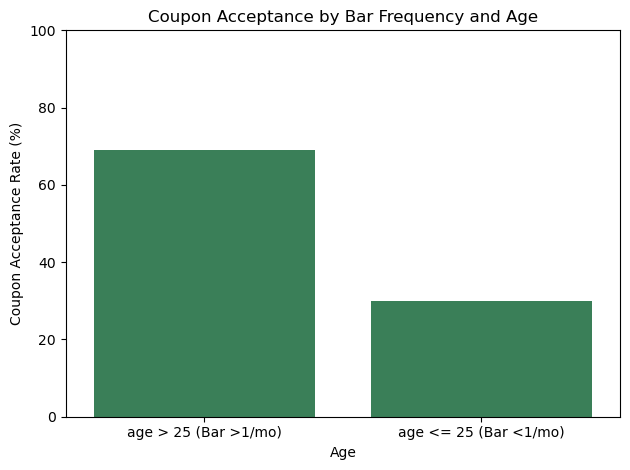

In [158]:
over_age_25 = ["26", "31", "50plus", "36", "41", "46"]
went_more_than_once = ['1~3', '4~8', 'gt8']
went_fewer_than_once = ['never', 'less1']

# group A
# those who accepted and went to bar more than or equal to once
bar_went_more_than_once_and_accepted_df = bar_df[(bar_df["is_coupon_accepted"] == True) & (bar_df["bar"].isin(went_more_than_once))].groupby(["age"]).size().reset_index(name = "count")
#print(bar_went_more_than_once_and_accepted_df)

# those with age over 25 who accepted and went to bar more than or equal to once 
went_more_than_once_over_25 = bar_went_more_than_once_and_accepted_df[bar_went_more_than_once_and_accepted_df["age"].isin(over_age_25)]["count"].sum()
# print(went_more_than_once_over_25)

# group B
# those who accepted and went to bar less than once
bar_went_less_than_once_and_accepted_df = bar_df[(bar_df["is_coupon_accepted"] == True) & (bar_df["bar"].isin(went_fewer_than_once))].groupby(["age"]).size().reset_index(name = "count")
#print(bar_went_less_than_once_and_accepted_df)

# those with age below 25 who accepted and went to bar less than once 
went_less_than_once_below_25 = bar_went_less_than_once_and_accepted_df[~bar_went_less_than_once_and_accepted_df["age"].isin(over_age_25)]["count"].sum()
# print(went_more_than_once_below_25)

total = went_more_than_once_over_25 + went_less_than_once_below_25
acceptance_age_over_25 = int(100 * went_more_than_once_over_25/total)
acceptance_age_below_25 = int(100 * went_less_than_once_below_25/total)

acceptance_rate_bar_dict = {
    "rate": [acceptance_age_over_25, acceptance_age_below_25],
    "group": ["age > 25 (Bar >1/mo)", "age <= 25 (Bar <1/mo)"]
}
acceptance_rate_bar_df = pd.DataFrame(acceptance_rate_bar_dict)
#print(acceptance_rate_bar_df)

# visualize the rate of acceptance
sns.barplot(data=acceptance_rate_bar_df, x='group', y='rate', color="seagreen")
plt.title("Coupon Acceptance by Bar Frequency and Age")
plt.ylim(0, 100)
plt.xlabel("Age")
plt.ylabel("Coupon Acceptance Rate (%)")
plt.tight_layout()
plt.savefig('images/bar/bar_coupon_acceptance_rate_by_age.png')
plt.show()

From above chart we see there is noticeable difference in coupon acceptance among the drivers over 25 age and who go to bar regularily to those who go fewer times and less than 25 age. The drivers in first group are likely to accept the coupon ~ twice the rate compared to second group.

Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.5. 


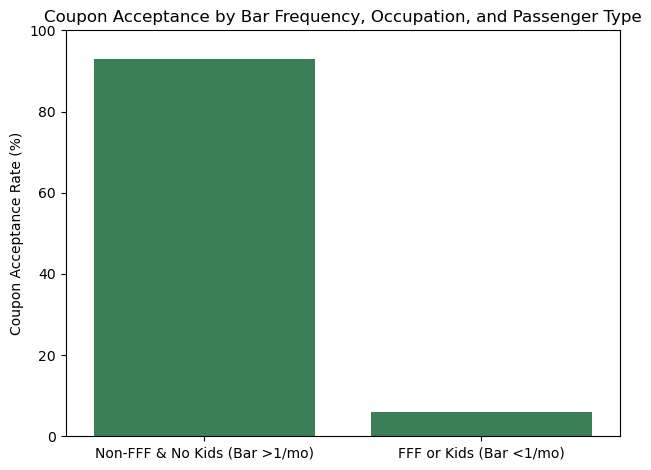

In [159]:
went_more_than_once = ['1~3', '4~8', 'gt8']
went_fewer_than_once = ['never', 'less1']
fff = ["Farming Fishing & Forestry"]
kids = ["Kid(s)"]

# group - A
# those who accepted and went to bar more than or equal to once
bar_accepted_more_than_once_occupation_passenger_df = bar_df[(bar_df["is_coupon_accepted"] == True) & (bar_df["bar"].isin(went_more_than_once))].groupby(["occupation", "passenger"]).size().reset_index(name = "count")
# print(bar_accepted_more_than_once_occupation_passenger_df)

# those who accepted and went to bar more than once and are not in FFF occupation and have no kid passengers
bar_accepted_nonfarm_passenger_nokids = bar_accepted_more_than_once_occupation_passenger_df.query("(occupation not in @fff) and (passenger not in @kids)")["count"].sum()
# print(bar_accepted_nonfarm_passenger_nokids)

# group - B
# those who accepted and went to bar fewer than once
bar_accepted_less_than_once_occupation_passenger_df = bar_df[(bar_df["is_coupon_accepted"] == True) & (bar_df["bar"].isin(went_fewer_than_once))].groupby(["occupation", "passenger"]).size().reset_index(name = "count")
# print(bar_accepted_less_than_once_occupation_passenger_df)

# those who accepted and went to bar less than once and are either in FFF occupation or have kid passengers
bar_accepted_farm_passenger_kids = bar_accepted_less_than_once_occupation_passenger_df.query("(occupation in @fff) or (passenger in @kids)")["count"].sum()
# print(bar_accepted_farm_passenger_kids)

total = bar_accepted_nonfarm_passenger_nokids + bar_accepted_farm_passenger_kids
bar_accepted_rate_nonfarm_passenger_nokids = int(100 * bar_accepted_nonfarm_passenger_nokids/total)
bar_accepted_rate_farm_passenger_kids = int(100 * bar_accepted_farm_passenger_kids/total)

acceptance_rate_bar_dict = {
    "rate": [bar_accepted_rate_nonfarm_passenger_nokids, bar_accepted_rate_farm_passenger_kids],
    "group": ["Non-FFF & No Kids (Bar >1/mo)", "FFF or Kids (Bar <1/mo)"]
}
acceptance_rate_bar_df = pd.DataFrame(acceptance_rate_bar_dict)

# visualize the rate of acceptance
sns.barplot(data=acceptance_rate_bar_df, x='group', y='rate', color="seagreen")
plt.title("Coupon Acceptance by Bar Frequency, Occupation, and Passenger Type")
plt.ylim(0, 100)
plt.xlabel("")
plt.ylabel("Coupon Acceptance Rate (%)")
plt.tight_layout()
plt.savefig('images/bar/bar_coupon_acceptance_rate_by_occupation.png')
plt.show()


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



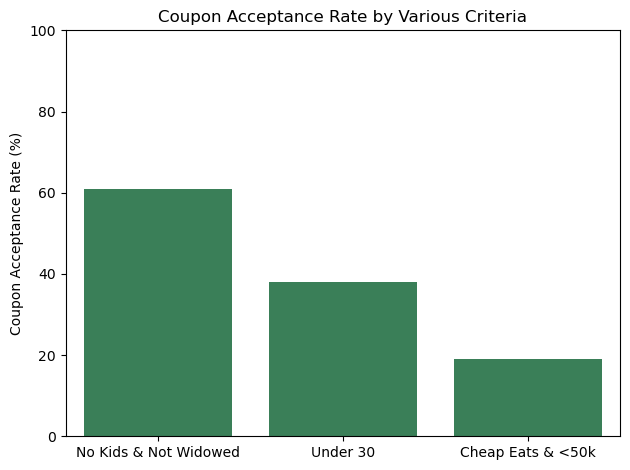

In [160]:
went_more_than_once = ['1~3', '4~8', 'gt8']
went_fewer_than_once = ['never', 'less1']
kids = ["Kid(s)"]
widowed = ["widowed"]
under_30 = ["21", "26", "below21"]
fewer_4 = ["1~3"]
less_50k = ["$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"]

bar_accepted_more_than_once_df = bar_df[(bar_df["is_coupon_accepted"] == True) & (bar_df["bar"].isin(went_more_than_once))]

# go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_accepted_more_than_once_no_kids_not_widowed_df = bar_accepted_more_than_once_df.query("passenger not in @kids & marital_status not in @widowed")
#print(bar_accepted_more_than_once_no_kids_not_widowed_df)
bar_accepted_more_than_once_no_kids_not_widowed_count = len(bar_accepted_more_than_once_no_kids_not_widowed_df)
#print(bar_accepted_more_than_once_no_kids_not_widowed_count)

# go to bars more than once a month and are under the age of 30
bar_accepted_more_than_once_age_under_30_df = bar_accepted_more_than_once_df.query("age in @under_30")
# print(bar_accepted_more_than_once_age_under_30_df)
bar_accepted_more_than_once_age_under_30_count = len(bar_accepted_more_than_once_age_under_30_df)
#print(bar_accepted_more_than_once_age_under_30_count)

# go to cheap restaurants more than 4 times a month and income is less than 50K
bar_accepted_more_than_once_cheap_rest_income_less_50k_df = bar_accepted_more_than_once_df.query("eat_at_restaurant_under_20_count not in @fewer_4 and income in @less_50k")
# print(bar_accepted_more_than_once_cheap_rest_income_less_50k_df)
bar_accepted_more_than_once_cheap_rest_income_less_50k_count = len(bar_accepted_more_than_once_cheap_rest_income_less_50k_df)
#print(bar_accepted_more_than_once_cheap_rest_income_less_50k_count)

total = bar_accepted_more_than_once_no_kids_not_widowed_count + bar_accepted_more_than_once_cheap_rest_income_less_50k_count + bar_accepted_more_than_once_cheap_rest_income_less_50k_count

acceptance_rate_bar_dict = {
    "rate": [int(100 * bar_accepted_more_than_once_no_kids_not_widowed_count/total), int(100 * bar_accepted_more_than_once_age_under_30_count/total), int(100 * bar_accepted_more_than_once_cheap_rest_income_less_50k_count/total)],
    "group": ["No Kids & Not Widowed", "Under 30", "Cheap Eats & <50k"]
}
acceptance_rate_bar_df = pd.DataFrame(acceptance_rate_bar_dict)

# visualize the rate of acceptance
sns.barplot(data=acceptance_rate_bar_df, x='group', y='rate', color="seagreen")
plt.title("Coupon Acceptance Rate by Various Criteria")
plt.ylim(0, 100)
plt.xlabel("")
plt.ylabel("Coupon Acceptance Rate (%)")
plt.tight_layout()
plt.savefig('images/bar/bar_coupon_acceptance_rate_by_criteria.png')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Hypothesis for Drivers Who Accepted Bar Coupons
- In general number of people who accepeted bar coupons are less than those who did not. 
- Bar coupons appeal more to drivers who are occasional bar-goers rather than frequent visitors. 
- Social factors, such as traveling with partners, and being free of childcare responsibilities (no kids), positively influence acceptance.
- Targeting drivers over 25 and those in non-agricultural professions may improve coupon acceptance rates.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [161]:
coffee_house_df = data.query("coupon == 'Coffee House'")
coffee_house_df.head(5)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,marital_status,...,coffee_house,carry_away,eat_at_restaurant_under_20_count,eat_at_restaurant_20_to_50_count,is_travel_time_ge_5min,is_travel_time_ge_15min,is_travel_time_ge_25min,is_direction_same,is_direction_opp,is_coupon_accepted
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


 What proportion of 'Coffee House' coupons were accepted?

  accepted  proportion
0       No          50
1      Yes          49


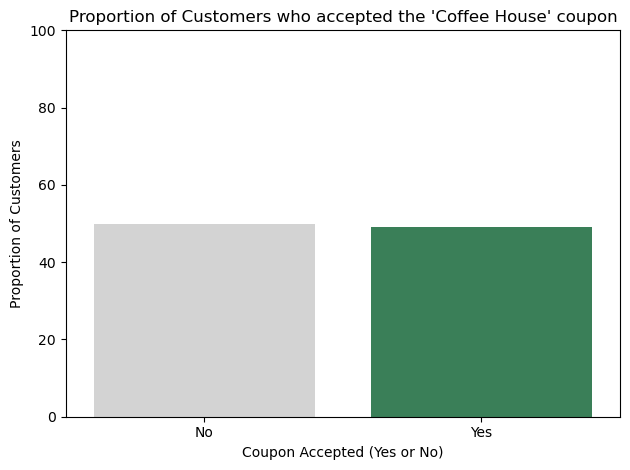

In [162]:
coffee_coupon_proportion_df = coffee_house_df['is_coupon_accepted'].value_counts(normalize=True).reset_index(name="proportion")
coffee_coupon_proportion_df['is_coupon_accepted'] = coffee_coupon_proportion_df['is_coupon_accepted'].replace({1: 'Yes', 0: 'No'})
coffee_coupon_proportion_df.rename(columns = {
    'is_coupon_accepted': 'accepted'
}, inplace=True)

coffee_coupon_proportion_df['proportion'] = (coffee_coupon_proportion_df['proportion'] * 100).astype(int)

print(coffee_coupon_proportion_df)

# Visualize the proportion of coupon acceptance
sns.barplot(data=coffee_coupon_proportion_df, x='accepted', y='proportion', hue='accepted', palette={'Yes': 'seagreen', 'No': 'lightgray'})
plt.title("Proportion of Customers who accepted the 'Coffee House' coupon")
plt.ylim(0, 100)
plt.xlabel("Coupon Accepted (Yes or No)")
plt.ylabel("Proportion of Customers")
plt.tight_layout()
plt.show()

In [163]:
print(data.columns)

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'marital_status', 'has_children',
       'education', 'occupation', 'income', 'car', 'bar', 'coffee_house',
       'carry_away', 'eat_at_restaurant_under_20_count',
       'eat_at_restaurant_20_to_50_count', 'is_travel_time_ge_5min',
       'is_travel_time_ge_15min', 'is_travel_time_ge_25min',
       'is_direction_same', 'is_direction_opp', 'is_coupon_accepted'],
      dtype='object')


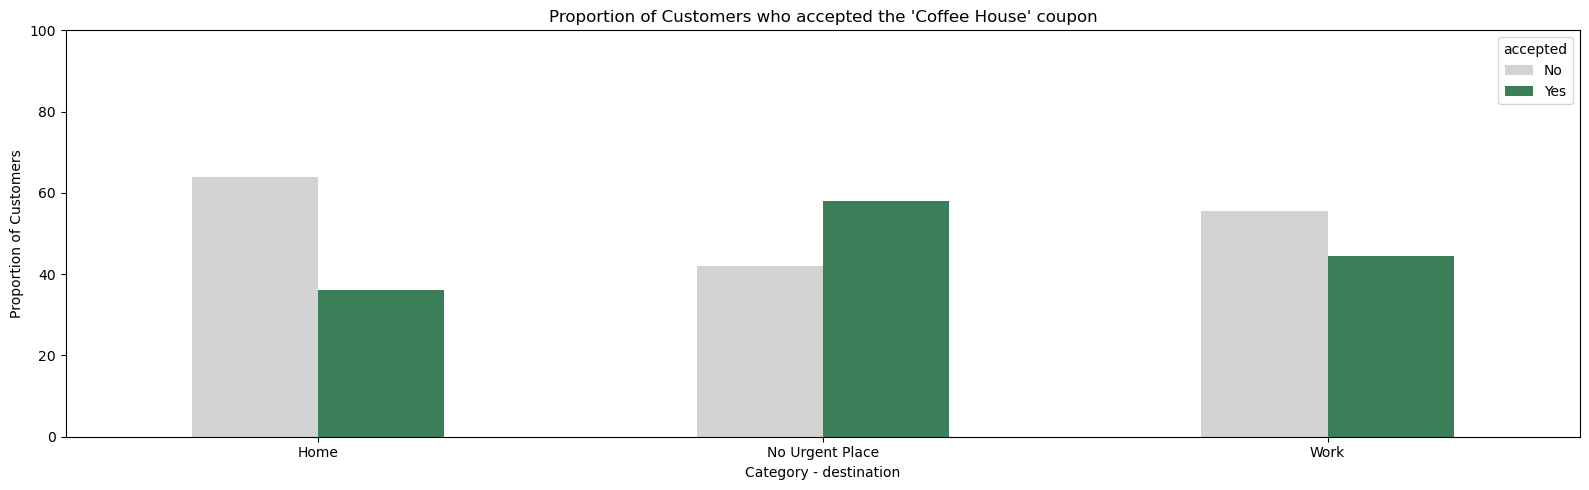

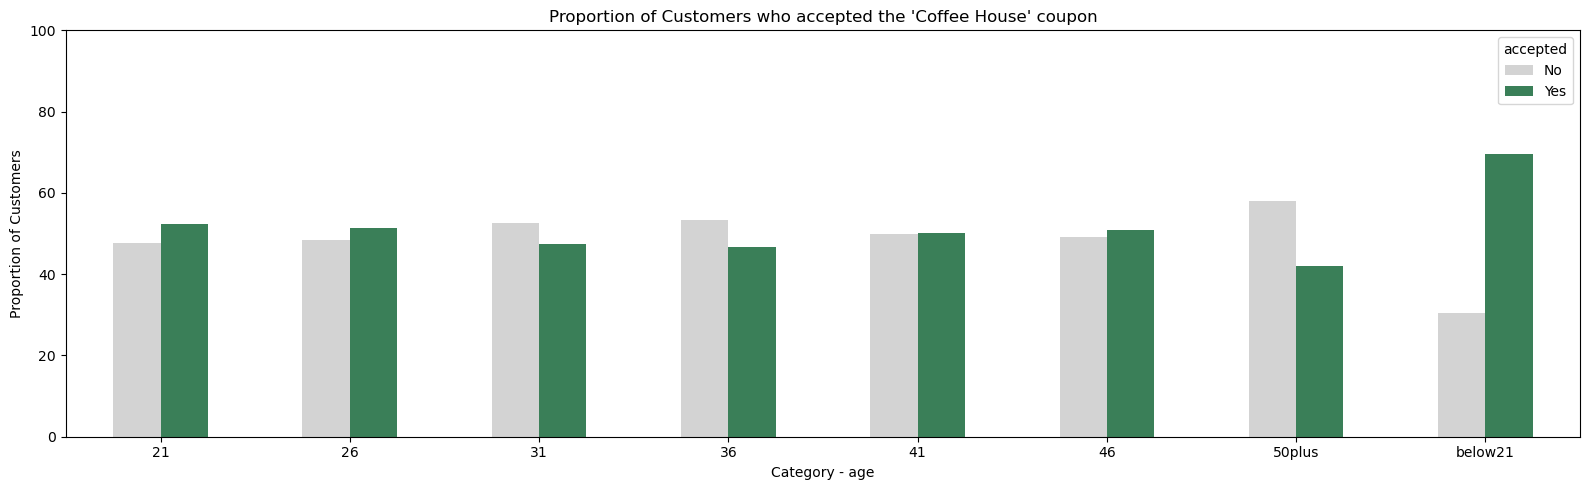

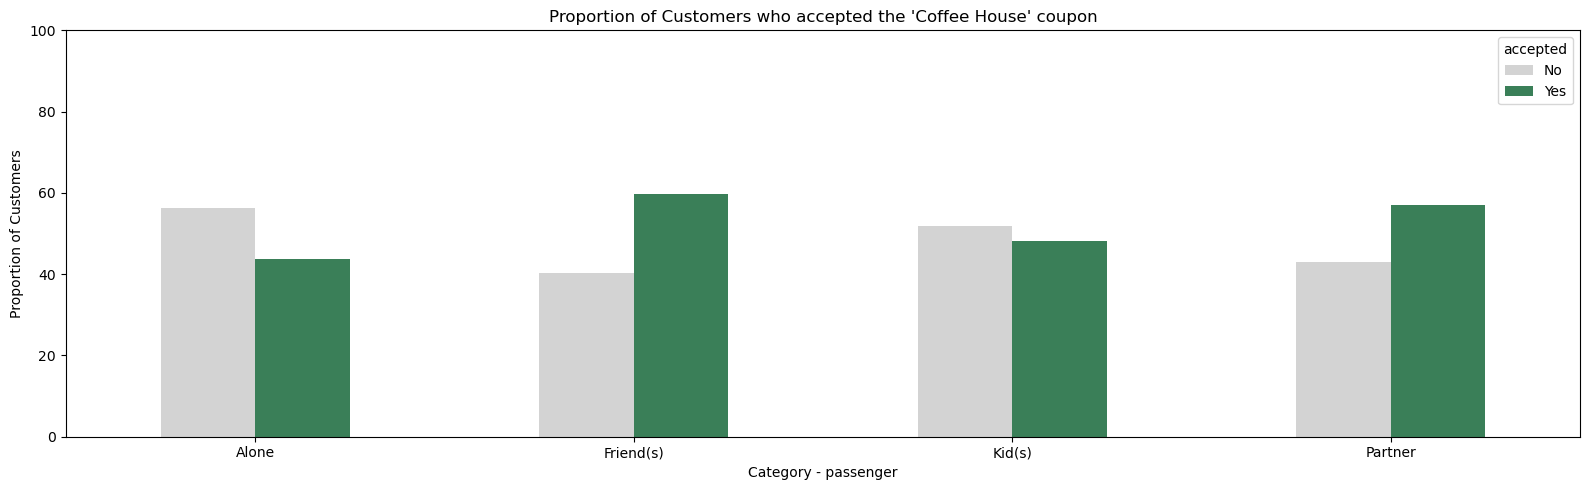

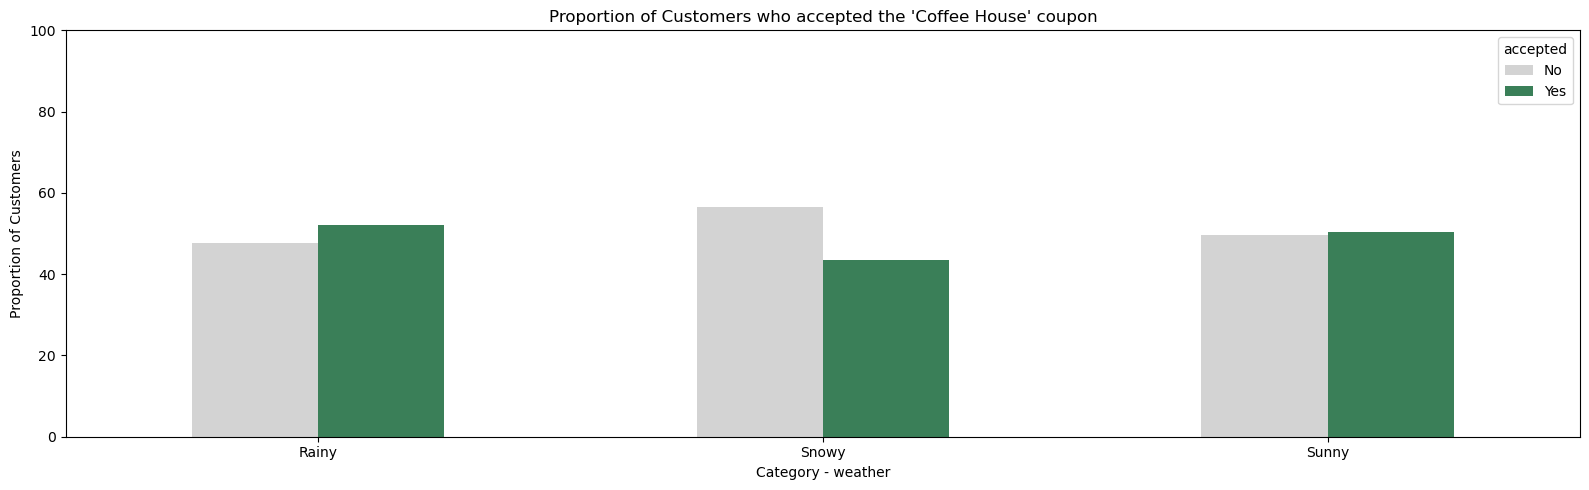

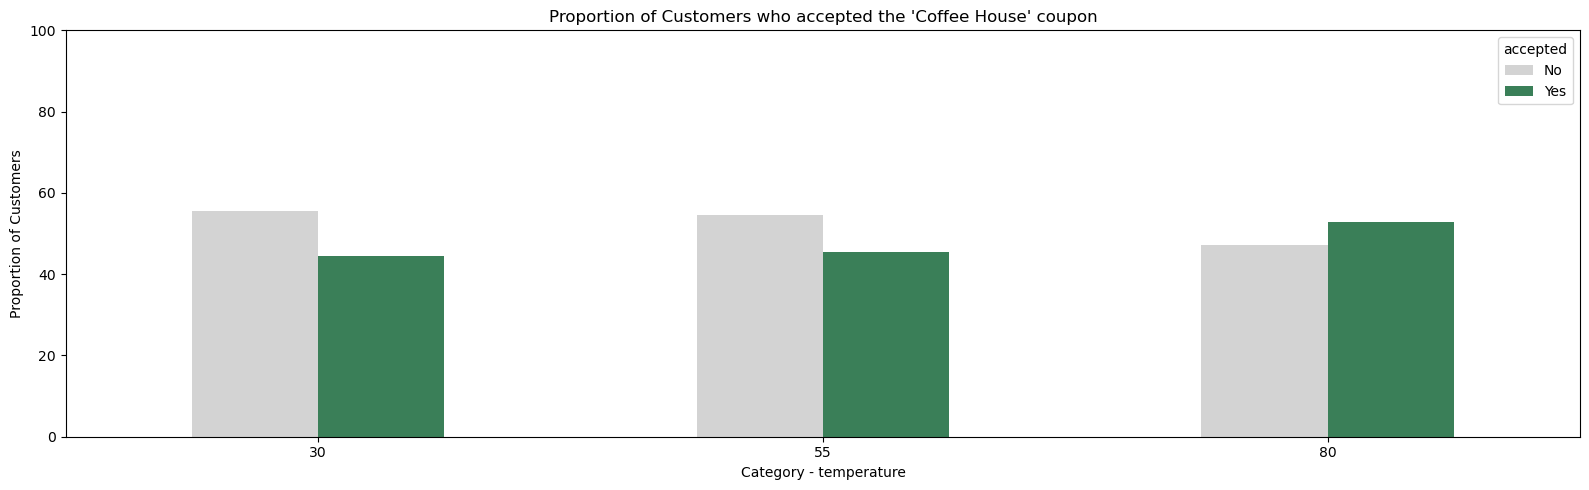

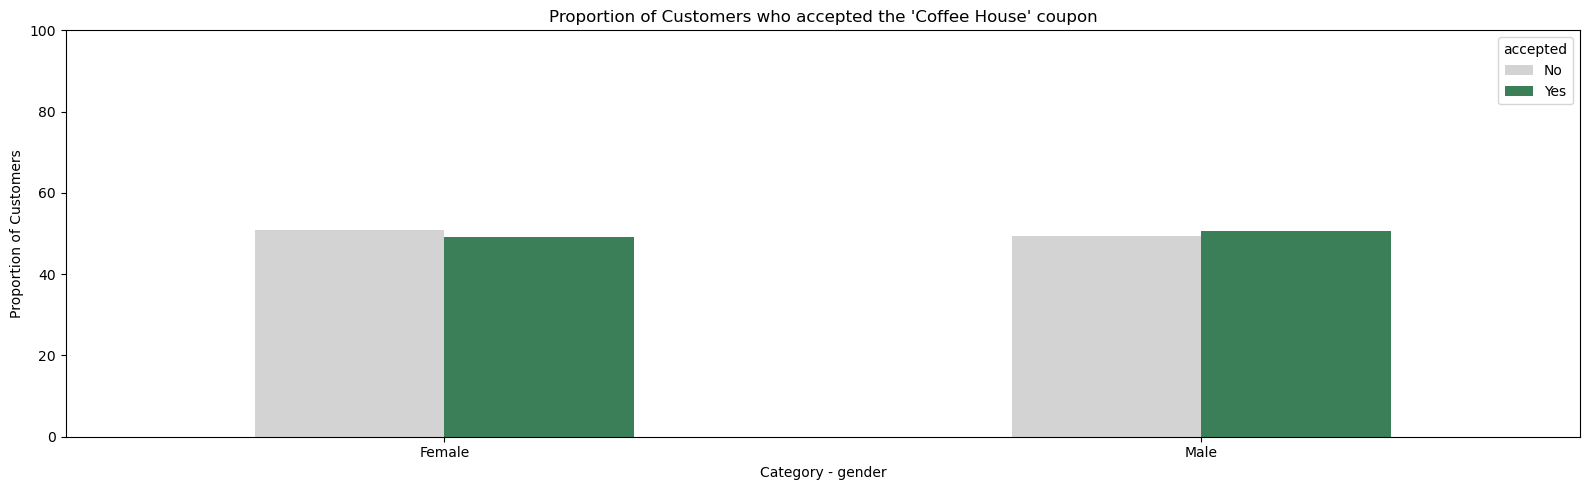

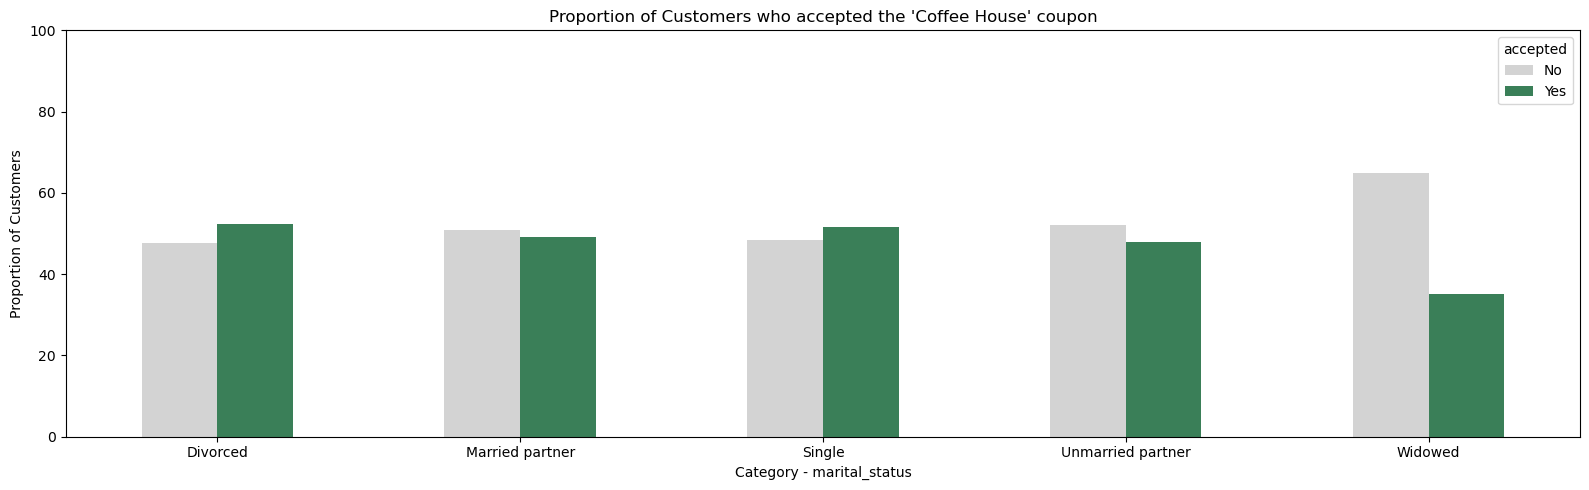

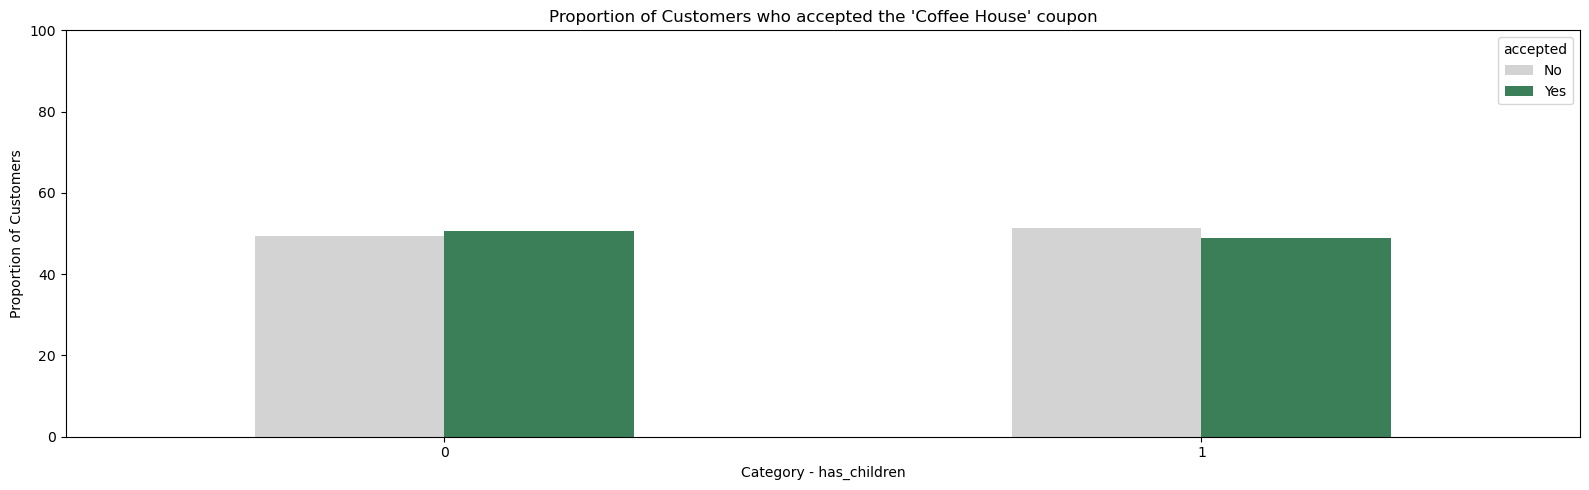

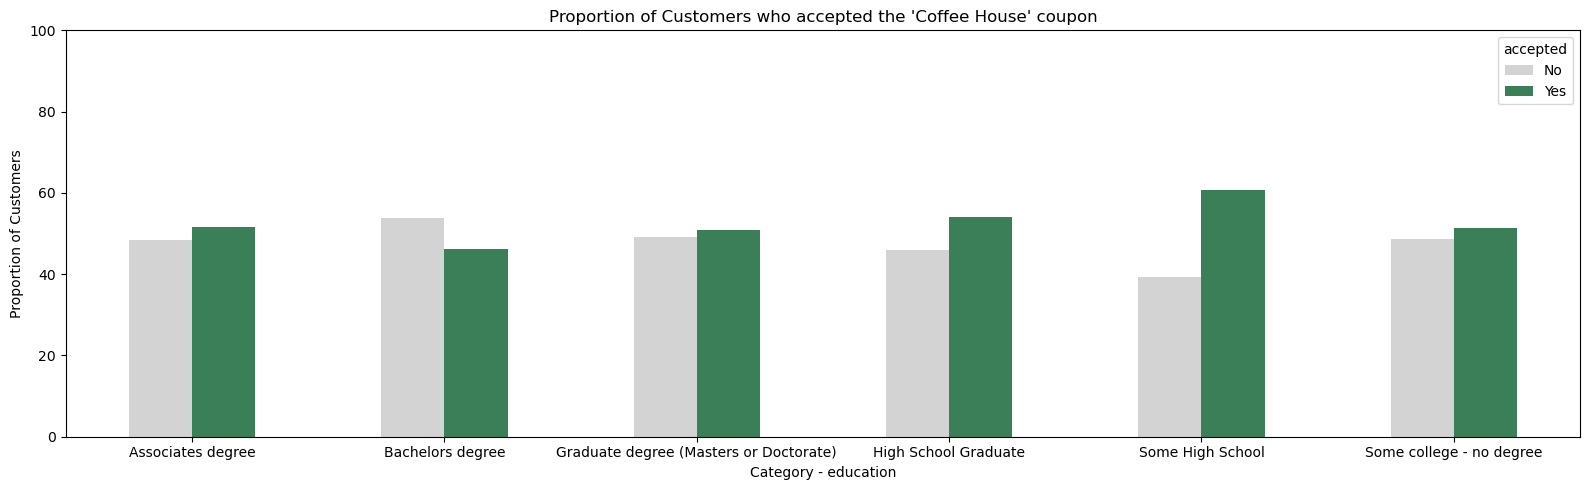

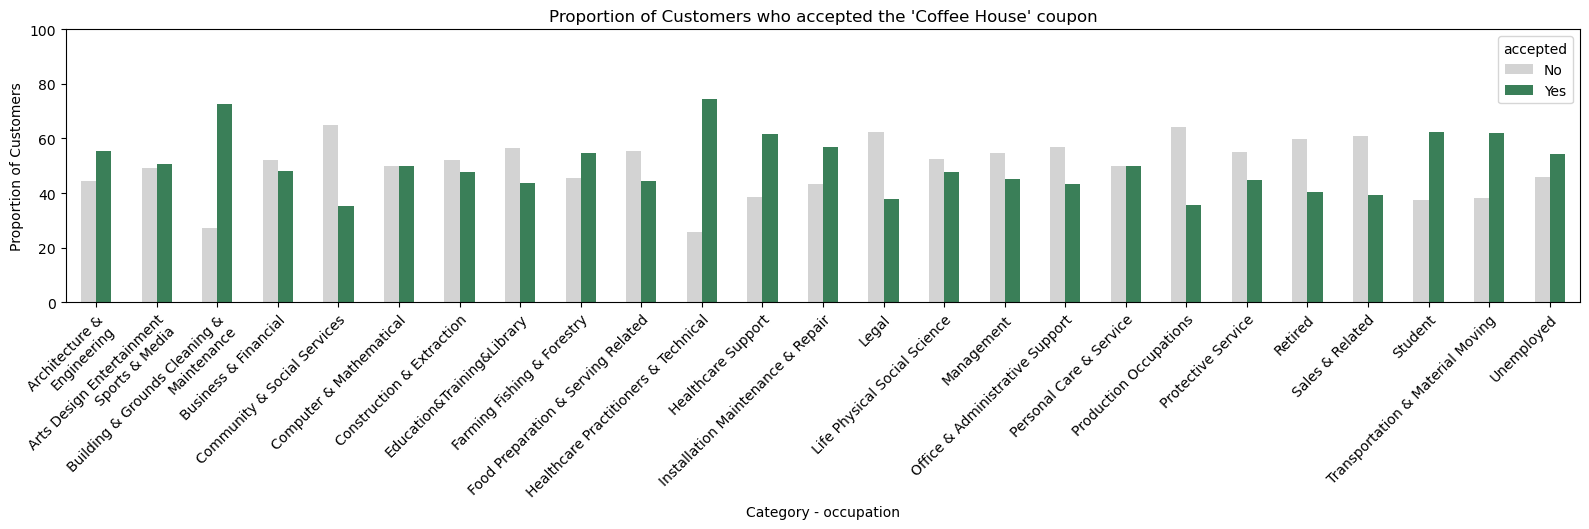

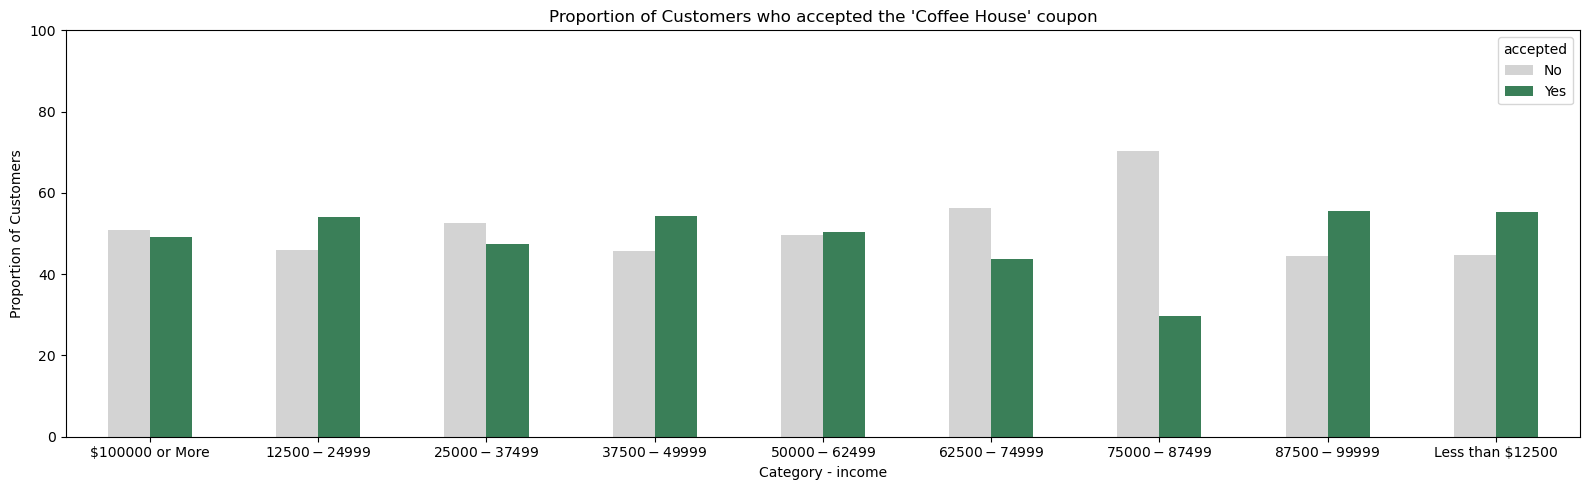

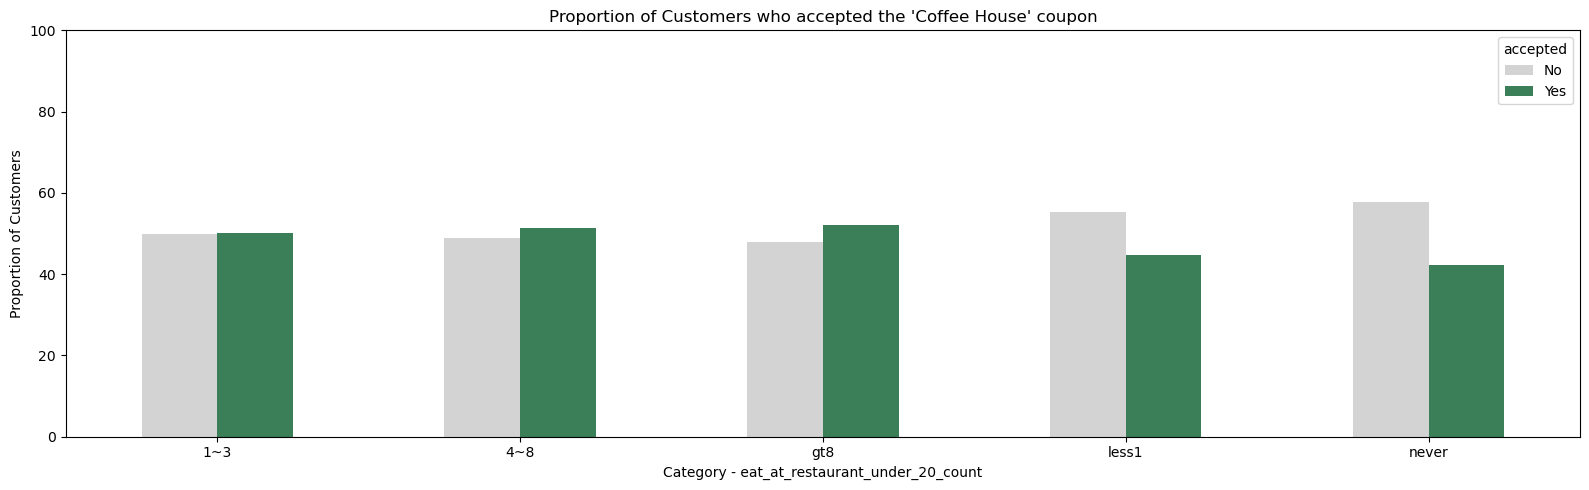

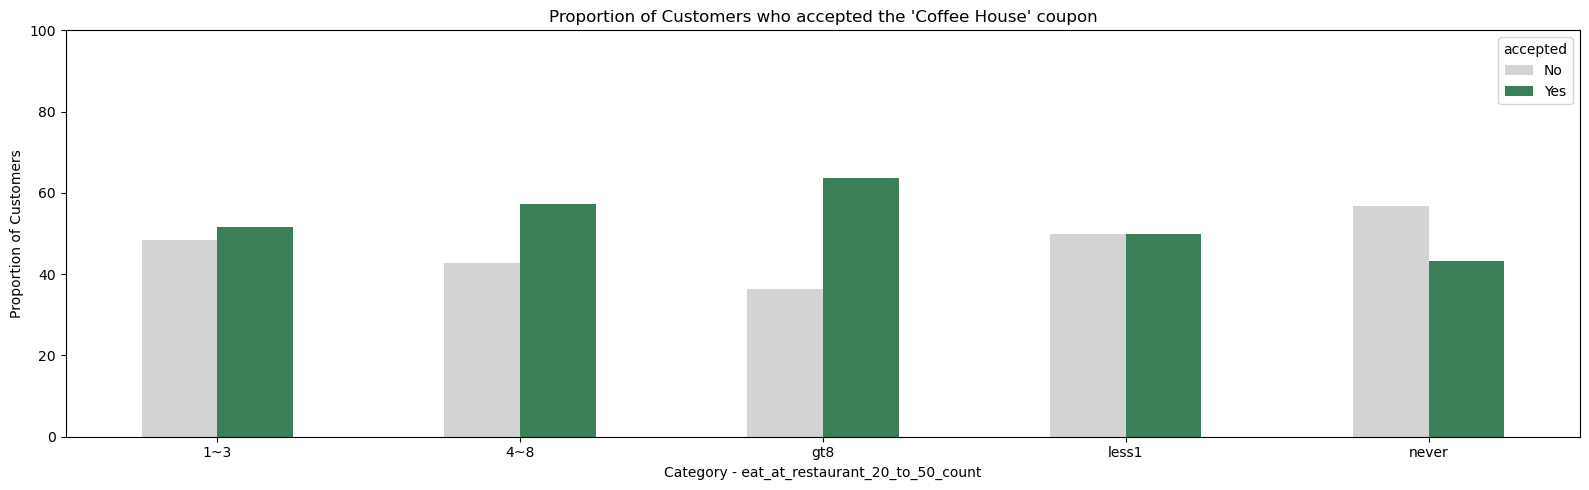

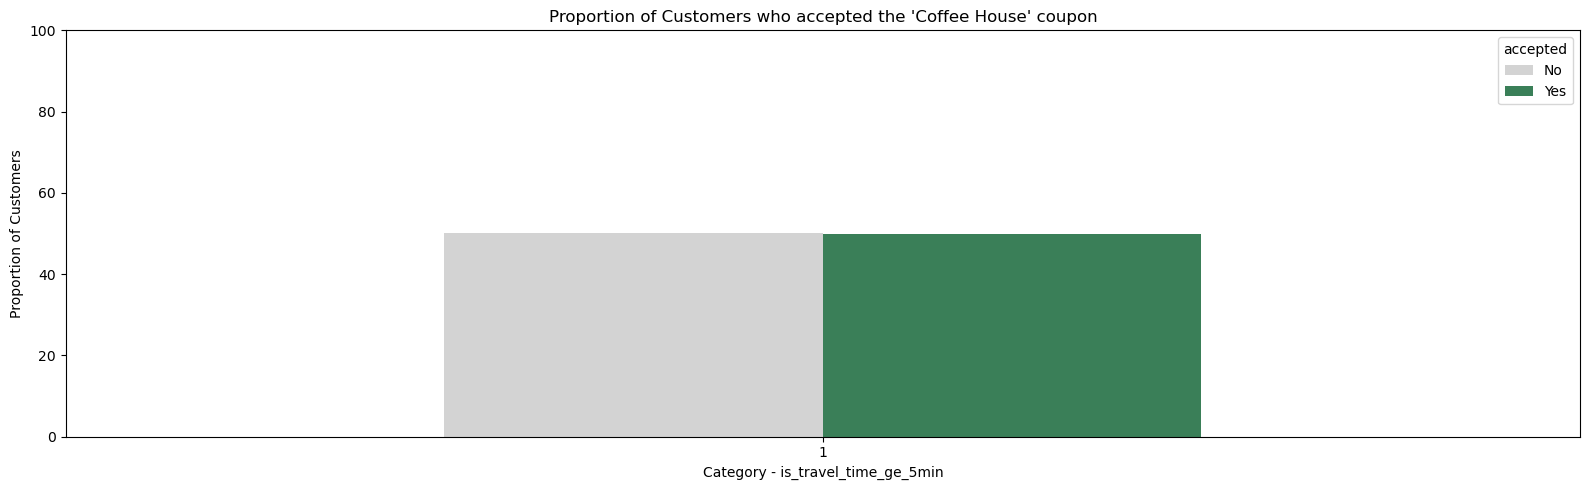

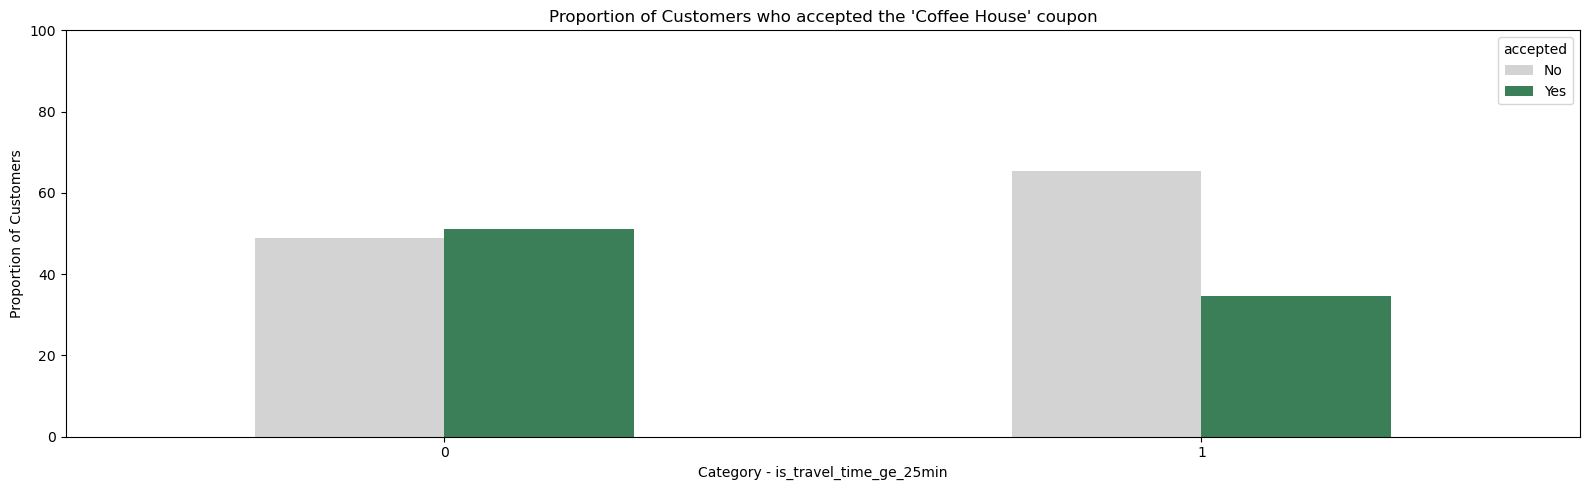

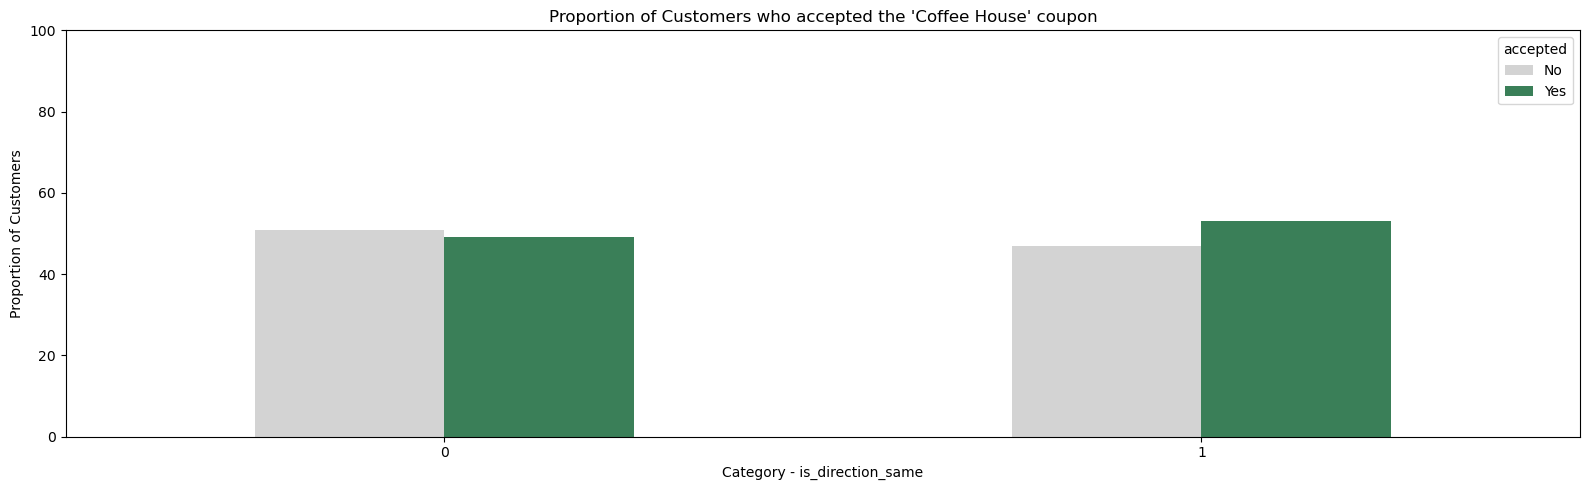

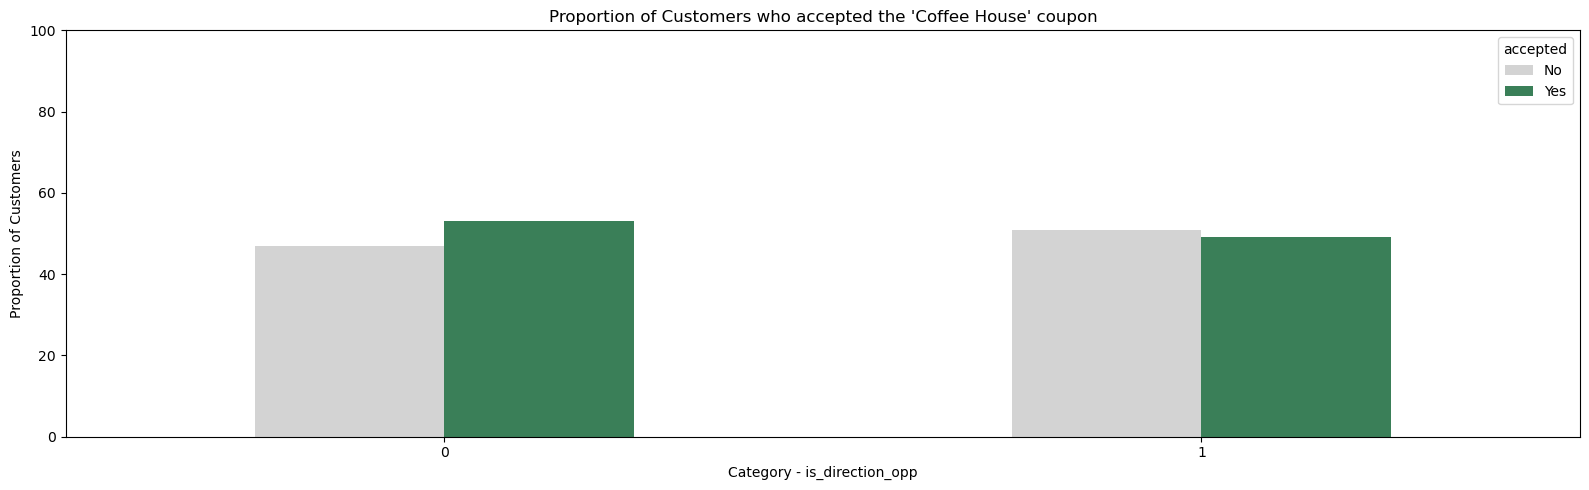

In [164]:
categorial_columns = ["destination", "age", "passenger", "weather", "temperature", "gender", "marital_status", "has_children", "education", "occupation", "income", "eat_at_restaurant_under_20_count", "eat_at_restaurant_20_to_50_count", "is_travel_time_ge_5min", "is_travel_time_ge_25min", "is_direction_same", "is_direction_opp"]

for column in categorial_columns:
    coffee_coupon_acceptance_df = coffee_house_df.groupby([column, "is_coupon_accepted"]).size().reset_index(name="count")

    # Calculate total per column (use transform so the shape is not modified)
    total_per_column = coffee_coupon_acceptance_df.groupby(column)["count"].transform("sum")
    #print(total_per_column)

    # Normalize the count
    coffee_coupon_acceptance_df["proportion"] = 100 * coffee_coupon_acceptance_df["count"] / total_per_column
    #print(coffee_coupon_acceptance_df)

    coffee_coupon_acceptance_df['is_coupon_accepted'] = coffee_coupon_acceptance_df['is_coupon_accepted'].replace({1: 'Yes', 0: 'No'})
    coffee_coupon_acceptance_df.rename(columns = {
        'is_coupon_accepted': 'accepted'
    }, inplace=True)

    # Visualize the proportion of coupon acceptance
    plt.figure(figsize=(16, 5))
    #sns.lineplot(data = coffee_coupon_acceptance_df, x = column, y = 'proportion', hue = 'accepted')
    sns.barplot(data=coffee_coupon_acceptance_df, x=column, y='proportion', hue='accepted', palette={'Yes': 'seagreen', 'No': 'lightgray'}, width=0.5)
    plt.title("Proportion of Customers who accepted the 'Coffee House' coupon")
    plt.ylim(0, 100)
    if column == "occupation":
        plt.xticks(rotation=45, ha='right', wrap=True)
    plt.xlabel("Category - " + column)
    plt.ylabel("Proportion of Customers")
    plt.tight_layout()
    plt.savefig(f'images/coffee_house/coffee_house_coupon_acceptance_rate_by_{column}.png')
    plt.show()


### Observations from above charts

- Younger drivers (under 26) are more likely to accept Coffee House coupons compared to older drivers.
- Female drivers may have a slightly higher acceptance rate for Coffee House coupons compared to male drivers.
- Drivers traveling with friends or partners are more likely to accept Coffee House coupons.
- Drivers in places with high temparatures are likely to accept Coffee House coupons.
- Single or divorced drivers are more likely to accept Coffee House coupons compared to married or widowed drivers.
- Drivers traveling alone or with kids are less likely to accept.
- Drivers with higher education levels (e.g., bachelor's or graduate degrees) are more likely to accept Coffee House coupons.
- Drivers in professional or business-related occupations are more likely to accept Coffee House coupons. Drivers in farming, fishing, or forestry occupations are less likely to accept.
- Drivers with low incomes (e.g., < $12500, $12,500–$24,999) are generally more likely to accept Coffee House coupons. That said the data is mixed.
- Drivers who frequently visit coffee houses (4+ times a month) are significantly more likely to accept Coffee House coupons.
   - Those who rarely visit coffee houses are less likely to accept.


### Recommendations:
- Target campaigns for Coffee House coupons toward younger, single drivers with higher education levels and mid-range incomes.
- Focus on drivers who frequently visit coffee houses and are traveling with friends or partners.